# Unsupervised ML

In [1]:

#-------------- default module --------------#
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

# ------------------ side dish -------------- #

from IPython.display import HTML
from matplotlib.colors import ListedColormap

# ---------- layout & optional view ------------ #
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # able to run multiple command in 1 line

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)  # display whole numbers without +3
pd.set_option('display.float_format', '{:,.1f}'.format) # thousand separated by comma
pd.options.display.float_format = '{:,}'.format # thousand separated by comma

sns.color_palette("PuBu")
sns.set_style("whitegrid")

custom_palette = ["#1e81b0", "#e28743", "#eab676", "#76b5c5", "#abdbe3", "#063970" , "#154c79", "#1979a9"]
sns.set_palette(custom_palette)
sns.set(style="whitegrid", font_scale=1.2, palette=custom_palette)

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
folder = '/Users/amarindraardinova/Documents/Data Scientist/Rakamin/Rakamin/04. VIX/VIX 03/week3/tugas_akhir/'

data = f"{folder}data_unsupervised.csv"
df = pd.read_csv(data)

In [3]:
df.shape
df.head()

(48740, 81)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   
1             0          99,000.0   222,768.0     17,370.0        180,000.0   
2             0         202,500.0   663,264.0     69,777.0        630,000.0   
3             2         315,000.0 1,575,000.0     49,018.5      1,575,000.0   
4             1         180,000.0   625,500.0     32,067.0        625,500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2   Unaccompanied          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                     0.01885   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       19241           2329            5,170.0              812          0.0   
1       18064           4469            9,118.0             1623          0.0   
2       20038           4458            2,175.0             3503          5.0   
3       13976           1866            2,000.0             4208          0.0   
4       13040           2191            4,000.0             4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1            Laborers              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0            Laborers              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

## Function

In [4]:
 def summary(df):
        summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary_df['missing#'] = df.isna().sum()
        summary_df['missing%'] = round((df.isna().sum()) / len(df), 2)
        summary_df['duplicated#'] = df.duplicated().sum()
        summary_df['duplicated%'] = (df.duplicated().sum()) / len(df)
        summary_df['uniques'] = df.nunique().values
        summary_df['count'] = df.count().values
        summary_df['unique'] = [df[col].unique()[:4] for col in df.columns]
        summary_df['mode'] = df.mode().transpose().iloc[:, 0].values
 
     # Merge numerical summary information
        numerical_cols = df.select_dtypes(include=['number']).columns
        numerical_summary_df = pd.DataFrame({
            'Mean': df[numerical_cols].mean(),
            'Median': df[numerical_cols].median()
        })
     
        summary_df = summary_df.merge(numerical_summary_df, left_index=True, right_index=True, how='left')
 
     # Apply background gradient to the summary DataFrame
        style = summary_df.style.background_gradient(cmap='Blues')
     
        return style 

In [5]:
summary(df)

# Univariate Analysis

In [6]:
df.describe().round(2)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
count    48,740.0      48,740.0          48,740.0    48,740.0     48,740.0   
mean   277,794.31           0.4         178,436.2  516,762.07    29,426.74   
std     103,168.5          0.71        101,525.12  365,400.06    16,012.17   
min     100,001.0           0.0          26,941.5    45,000.0      2,295.0   
25%    188,557.75           0.0         112,500.0   260,640.0     17,973.0   
50%     277,542.0           0.0         157,500.0   450,000.0     26,221.5   
75%     367,549.0           1.0         225,000.0   675,000.0     37,390.5   
max     456,250.0          20.0       4,410,000.0 2,245,500.0    180,576.0   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count         48,740.0                    48,740.0    48,740.0       48,740.0   
mean        462,626.34                        0.02   16,068.03      71,494.46   
std         336,711.62                        0.01    4,325.93     142,403.09   
min           45,000.0                         0.0     7,338.0            1.0   
25%          225,000.0                        0.01    12,496.0        1,048.0   
50%          396,000.0                        0.02    15,785.0        2,432.0   
75%          630,000.0                        0.03    19,637.0       6,166.25   
max        2,245,500.0                        0.07    25,195.0      365,243.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
count           48,740.0         48,740.0     48,740.0    48,740.0   
mean            4,967.78         3,051.69         3.97         1.0   
std             3,552.65          1,569.3         8.68         0.0   
min                  0.0              0.0          0.0         0.0   
25%              1,901.0          1,706.0          0.0         1.0   
50%              4,490.0          3,234.0          0.0         1.0   
75%             7,459.25          4,448.0          5.0         1.0   
max             23,722.0          6,348.0         74.0         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
count        48,740.0         48,740.0          48,740.0    48,740.0   
mean             0.81              0.2               1.0        0.26   
std              0.39              0.4              0.04        0.44   
min               0.0              0.0               0.0         0.0   
25%               1.0              0.0               1.0         0.0   
50%               1.0              0.0               1.0         0.0   
75%               1.0              0.0               1.0         1.0   
max               1.0              1.0               1.0         1.0   

       FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    48,740.0         48,740.0              48,740.0   
mean         0.16             2.15                  2.04   
std          0.37             0.89                  0.52   
min           0.0              1.0                   1.0   
25%           0.0              2.0                   2.0   
50%           0.0              2.0                   2.0   
75%           0.0              3.0                   2.0   
max           1.0             21.0                   3.0   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                     48,740.0                 48,740.0   
mean                          2.01                    12.01   
std                           0.52                     3.28   
min                           -1.0                      0.0   
25%                            2.0                     10.0   
50%                            2.0                     12.0   
75%                            2.0                     14.0   
max                            3.0                     23.0   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                    48,740.0                    48,740.0   
mean                         0.02                      

In [7]:
len(df.columns)

81

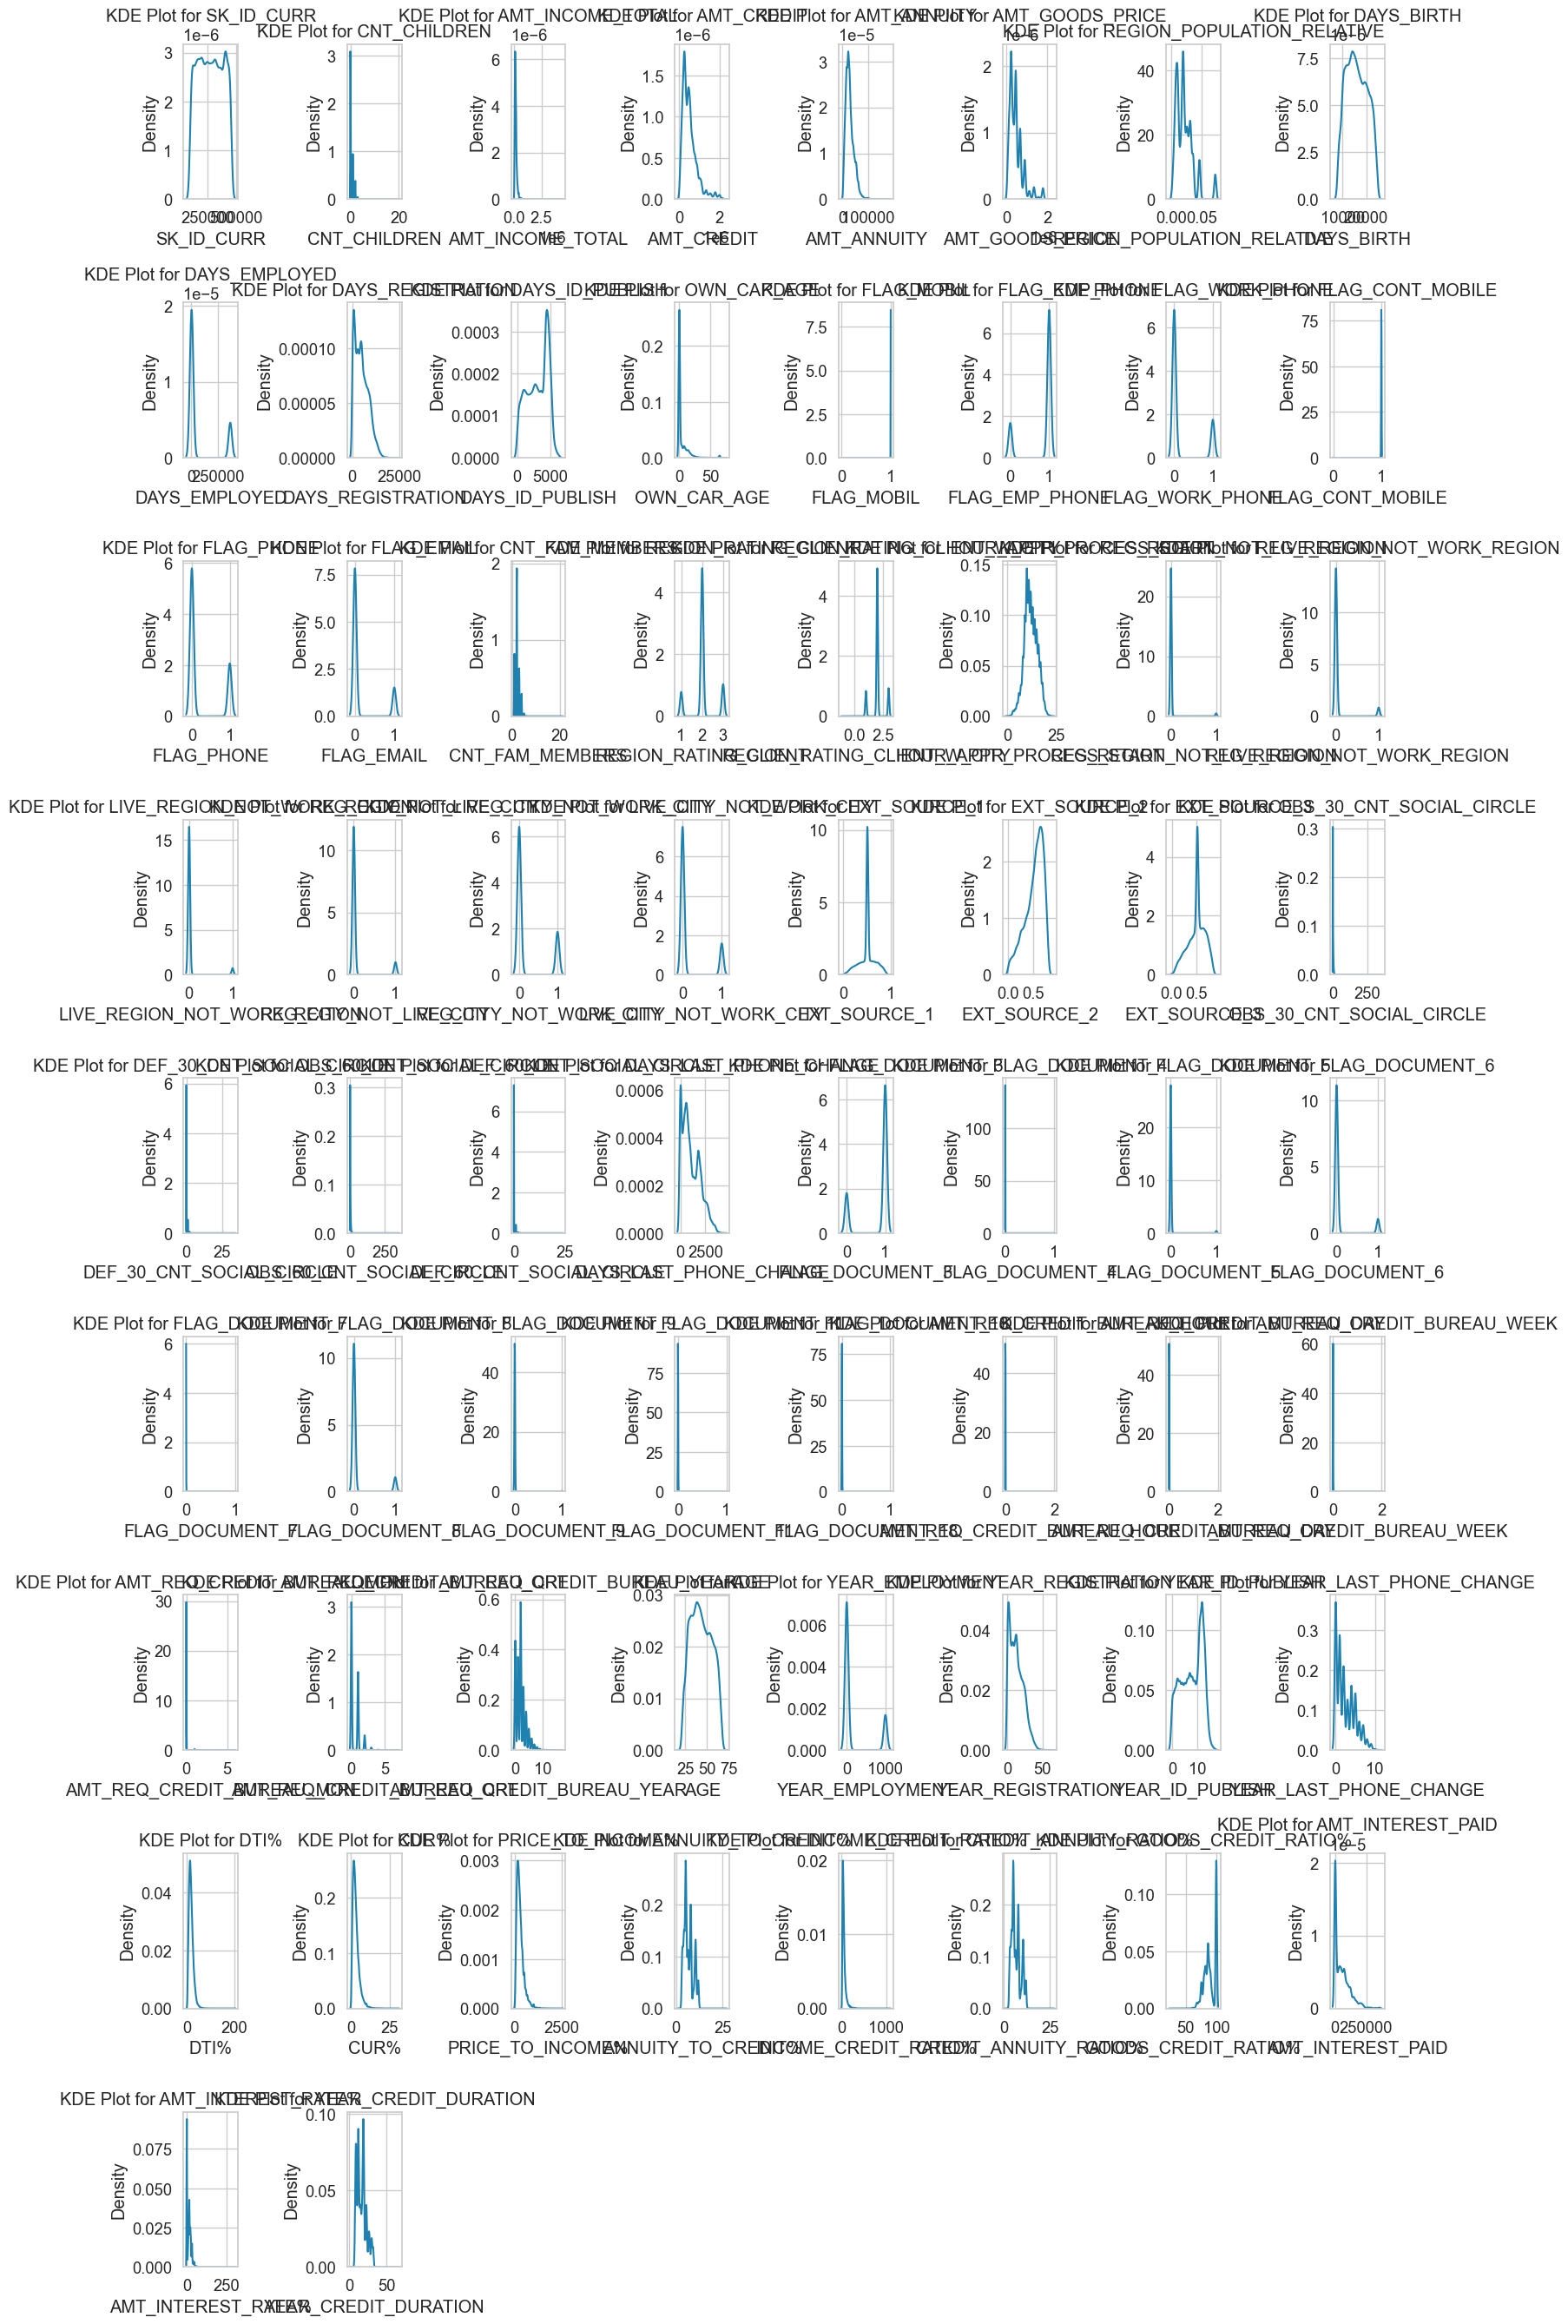

In [8]:
# skewness

nums = df.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns
cats = df.select_dtypes(include=['object']).columns


columns_per_row = 8

num_rows = len(nums) // columns_per_row + (len(nums) % columns_per_row > 0)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(nums):

    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

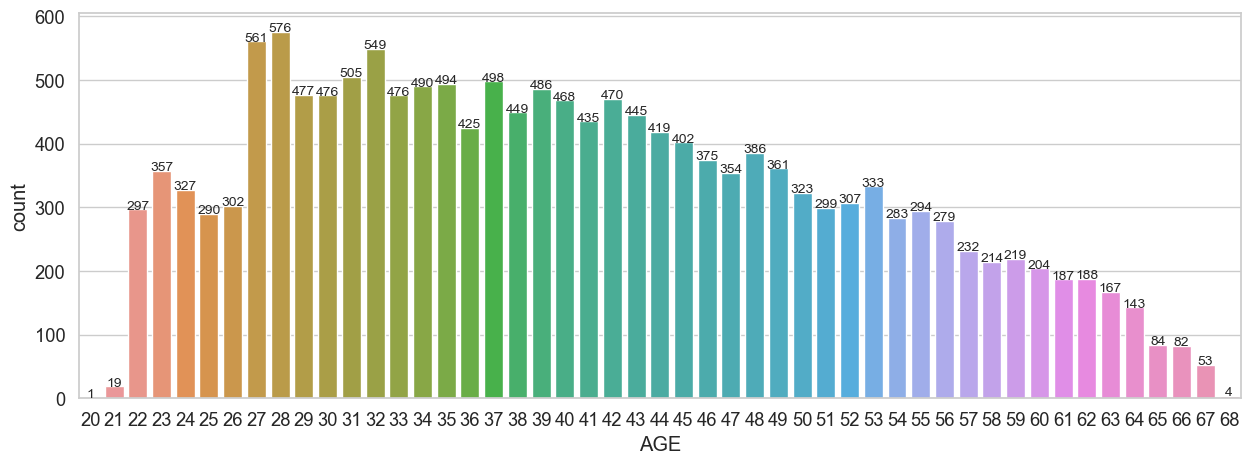

In [9]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='AGE', data = df[df['CODE_GENDER']=='M'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

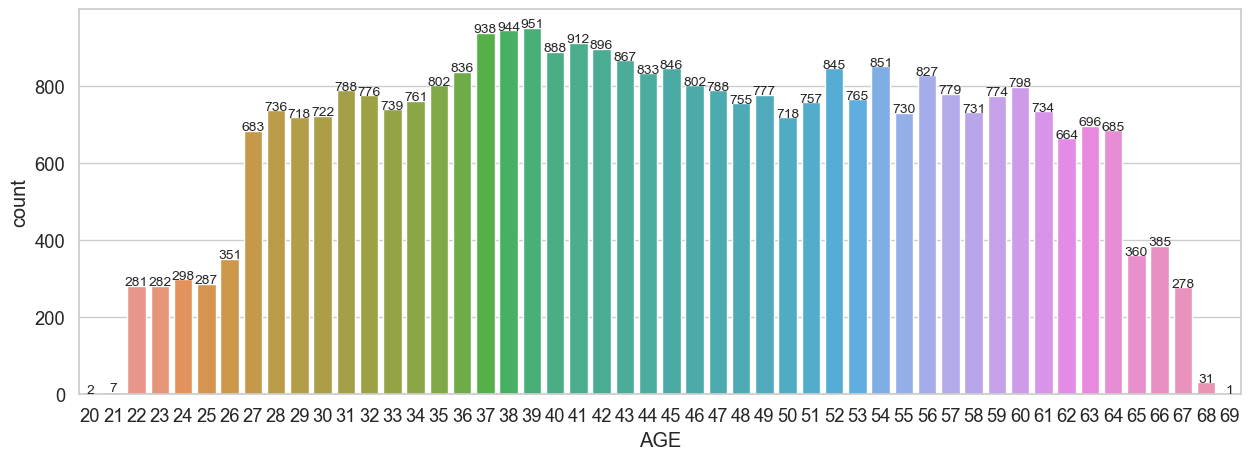

In [10]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='AGE', data = df[df['CODE_GENDER']=='F'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

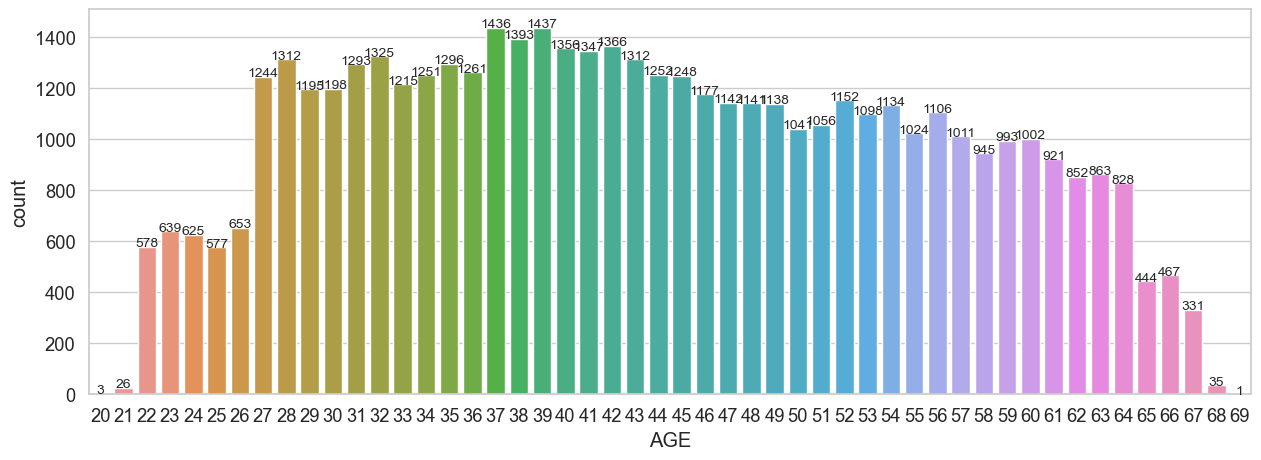

In [11]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='AGE', data = df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

# Bivariate Analysis

In [12]:
# # Assuming df is your DataFrame
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(df)
# plt.show();

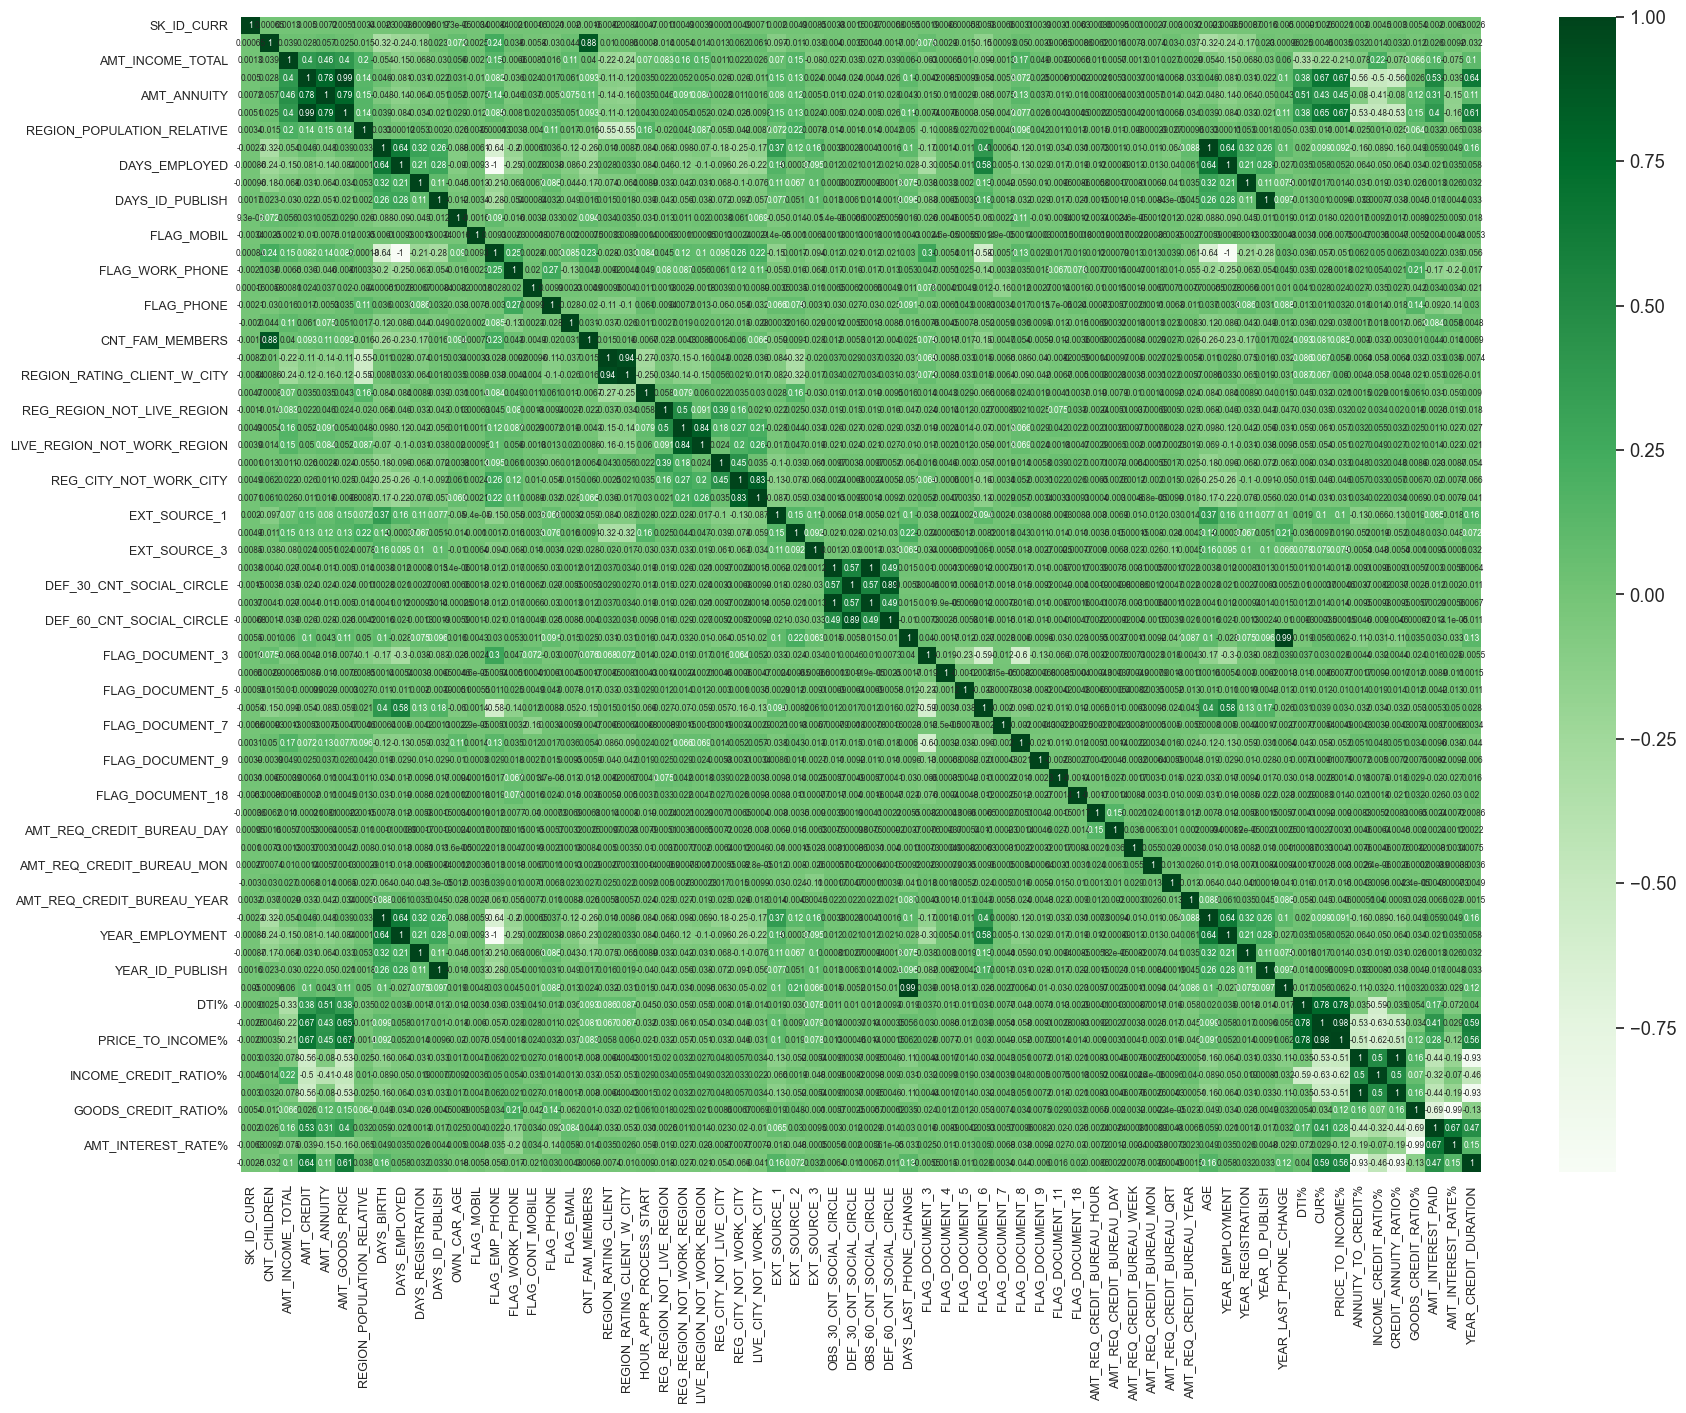

In [13]:
# full correlation heatmap (dx)
fig = plt.figure(figsize=(20,15))
sns.heatmap(data=df[nums].corr(), annot=True, cmap='Greens', annot_kws={"size": 6})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show();

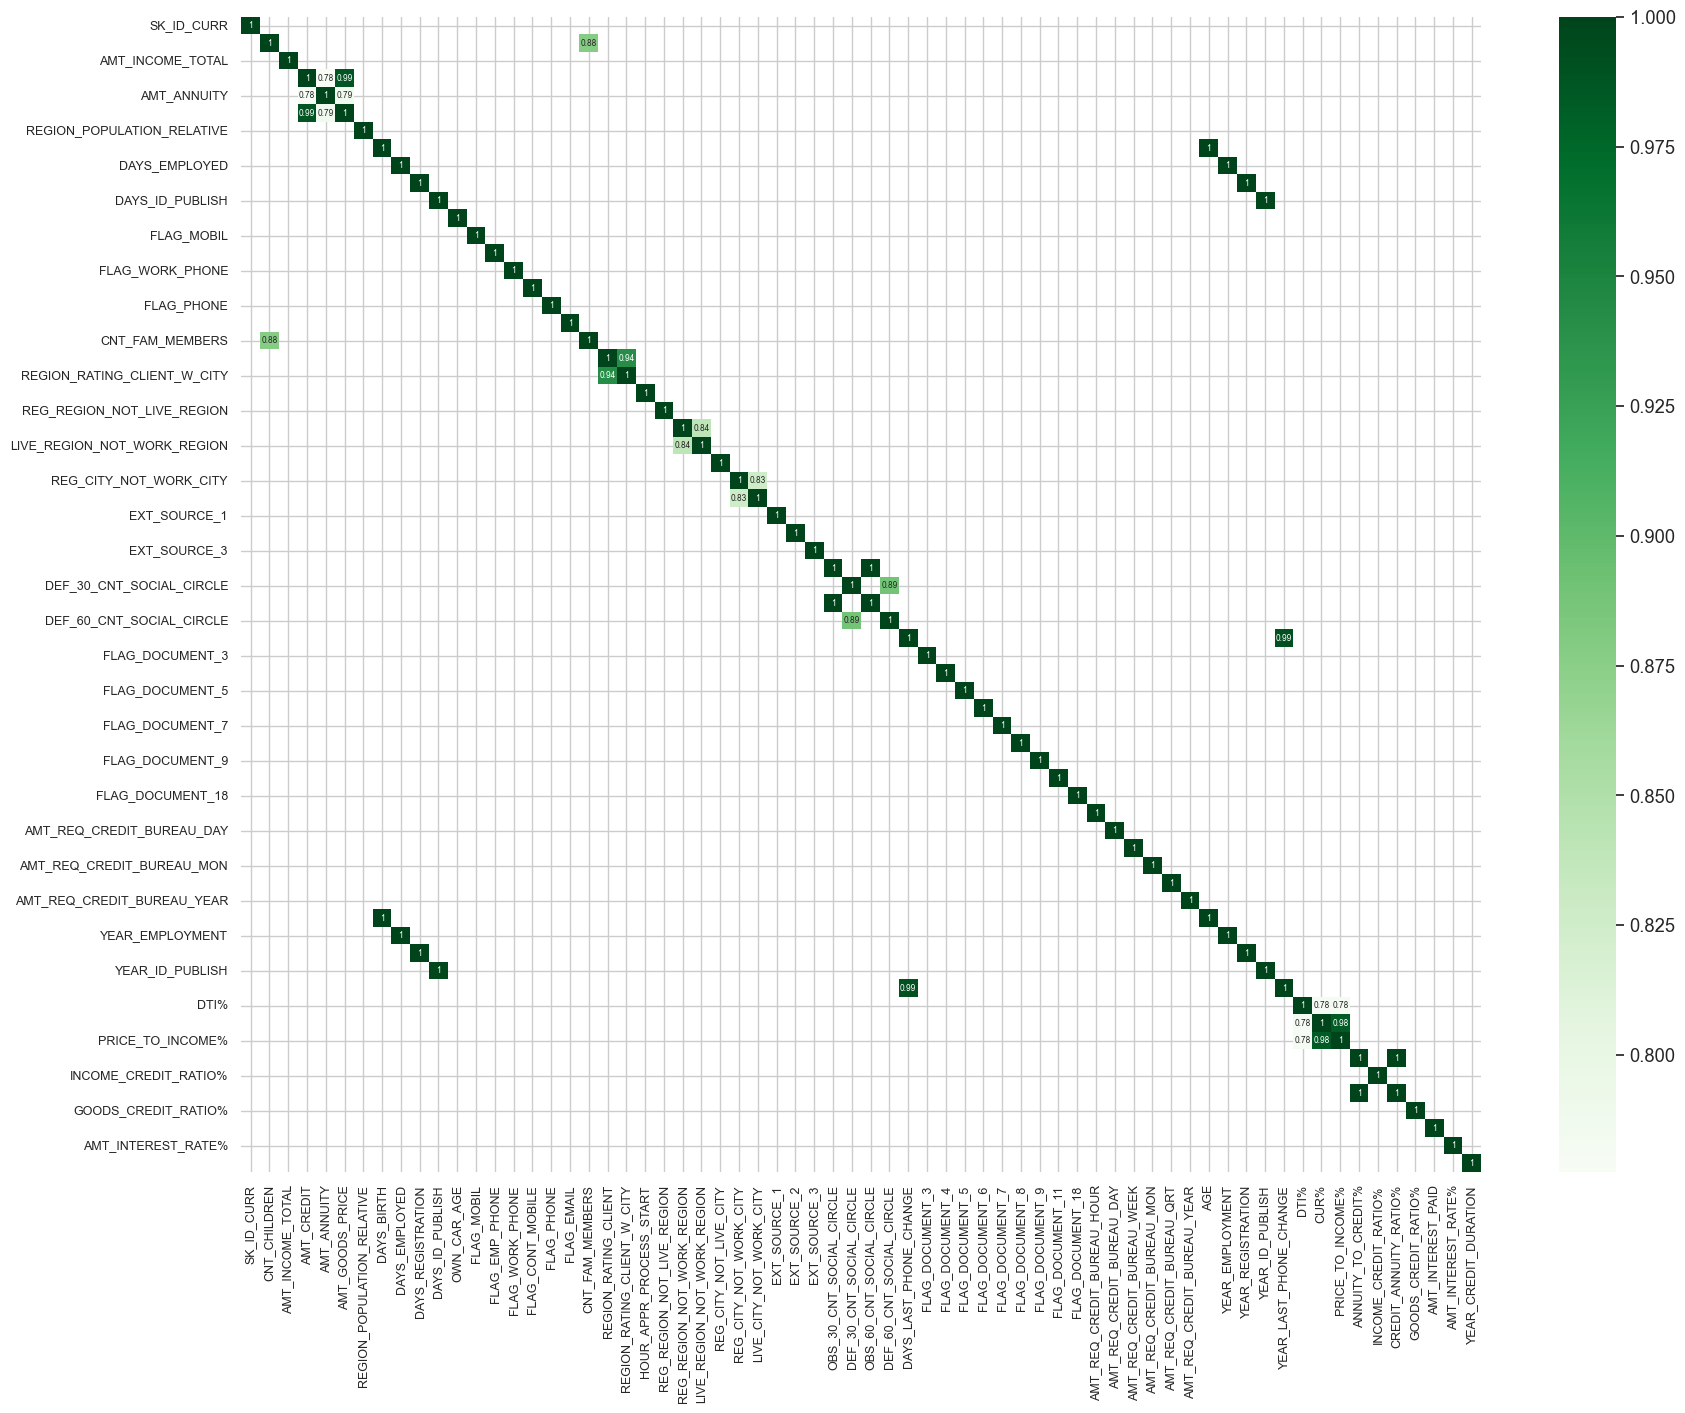

In [14]:
cormtrx = df[nums].corr()
cmx7 = cormtrx[(cormtrx > 0.7)]
# cmx7

# filter > 0.7 (cmx7)
fig = plt.figure(figsize=(20,15))
sns.heatmap(data=cmx7, annot=True, cmap='Greens', annot_kws={"size": 6})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show();

# Multidimentional Analysis

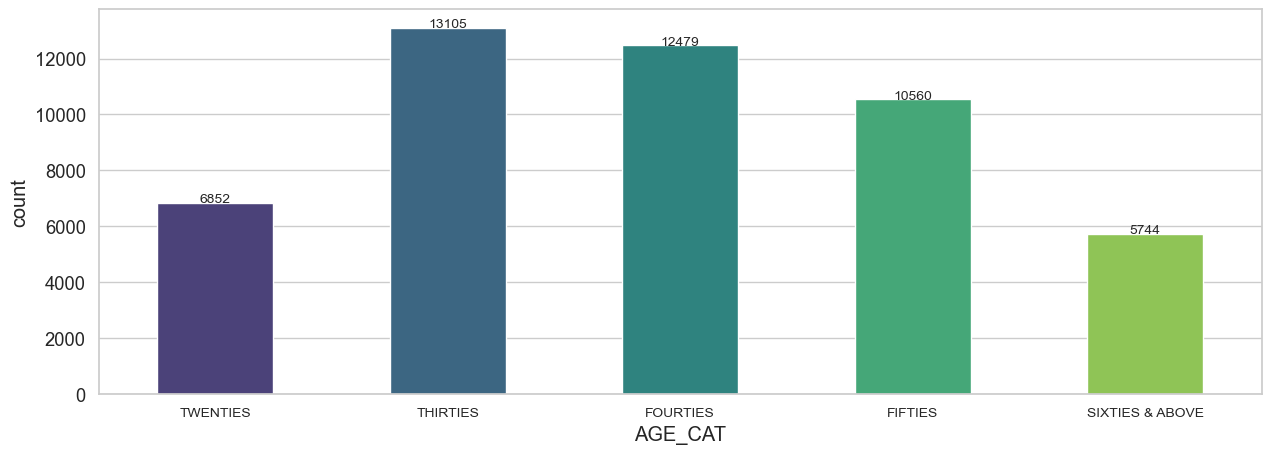

In [15]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='AGE_CAT', data = df, width=0.5, palette='viridis', 
                   order=['TWENTIES','THIRTIES','FOURTIES','FIFTIES','SIXTIES & ABOVE'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

ax.tick_params(axis='x', labelsize=10)

plt.show();

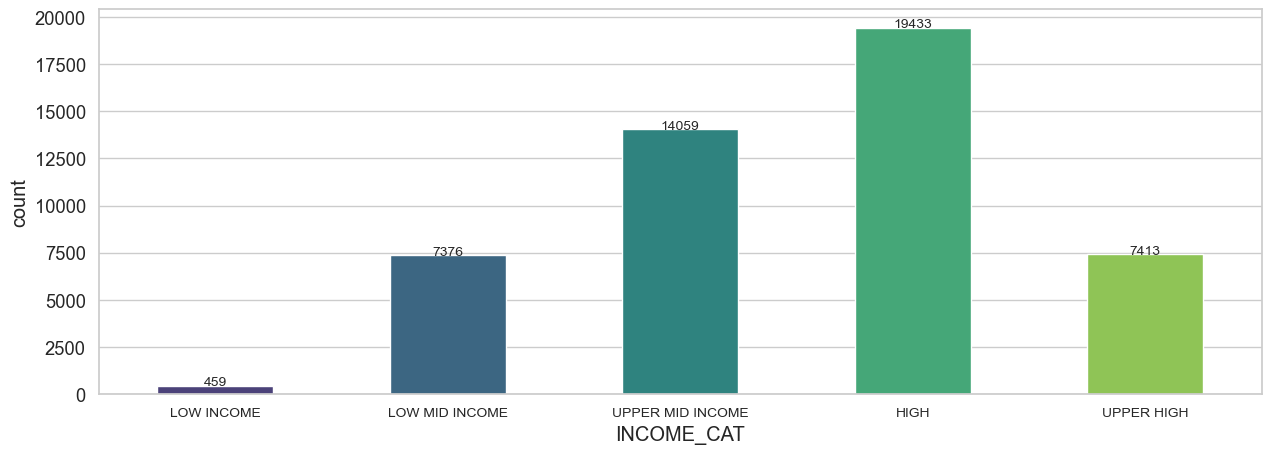

In [16]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='INCOME_CAT', data = df, width=0.5, palette='viridis', 
                   order=['LOW INCOME','LOW MID INCOME','UPPER MID INCOME','HIGH','UPPER HIGH'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

ax.tick_params(axis='x', labelsize=10)    
plt.show();

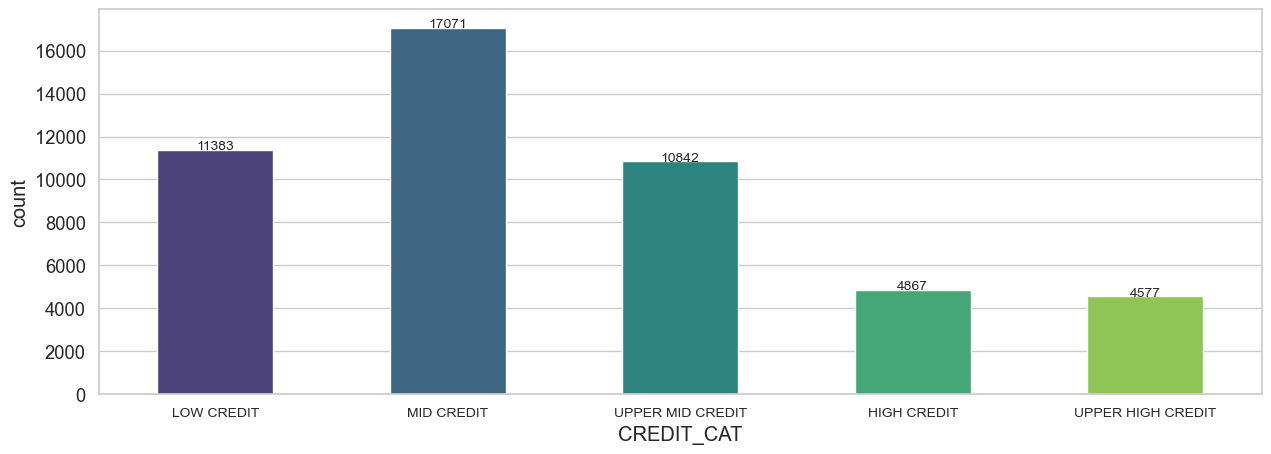

In [17]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='CREDIT_CAT', data = df, width=0.5, palette='viridis', 
                   order=['LOW CREDIT', 'MID CREDIT', 'UPPER MID CREDIT', 'HIGH CREDIT', 'UPPER HIGH CREDIT'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

ax.tick_params(axis='x', labelsize=10)    
plt.show();

In [18]:
df.CREDIT_CAT.value_counts()

CREDIT_CAT
MID CREDIT           17071
LOW CREDIT           11383
UPPER MID CREDIT     10842
HIGH CREDIT           4867
UPPER HIGH CREDIT     4577
Name: count, dtype: int64

In [19]:
df.groupby('AGE_CAT')['CREDIT_CAT'].count()

AGE_CAT
FIFTIES            10560
FOURTIES           12479
SIXTIES & ABOVE     5744
THIRTIES           13105
TWENTIES            6852
Name: CREDIT_CAT, dtype: int64

In [20]:
df_grouped = df.groupby(['INCOME_CAT', 'CREDIT_CAT'])['CREDIT_CAT'].count().reset_index(name='COUNT')
df_grouped

INCOME_CAT         CREDIT_CAT  COUNT
0               HIGH        HIGH CREDIT   2389
1               HIGH         LOW CREDIT   3204
2               HIGH         MID CREDIT   6799
3               HIGH  UPPER HIGH CREDIT   2003
4               HIGH   UPPER MID CREDIT   5038
5         LOW INCOME        HIGH CREDIT      4
6         LOW INCOME         LOW CREDIT    289
7         LOW INCOME         MID CREDIT    130
8         LOW INCOME  UPPER HIGH CREDIT      4
9         LOW INCOME   UPPER MID CREDIT     32
10    LOW MID INCOME        HIGH CREDIT    242
11    LOW MID INCOME         LOW CREDIT   3362
12    LOW MID INCOME         MID CREDIT   2767
13    LOW MID INCOME  UPPER HIGH CREDIT     89
14    LOW MID INCOME   UPPER MID CREDIT    916
15        UPPER HIGH        HIGH CREDIT   1312
16        UPPER HIGH         LOW CREDIT    543
17        UPPER HIGH         MID CREDIT   1622
18        UPPER HIGH  UPPER HIGH CREDIT   1949
19        UPPER HIGH   UPPER MID CREDIT   1987
20  UPPER MID INCOME        HIGH CREDIT    920
21  UPPER MID INCOME         LOW CREDIT   3985
22  UPPER MID INCOME         MID CREDIT   5753
23  UPPER MID INCOME  UPPER HIGH CREDIT    532
24  UPPER MID INCOME   UPPER MID CREDIT   2869

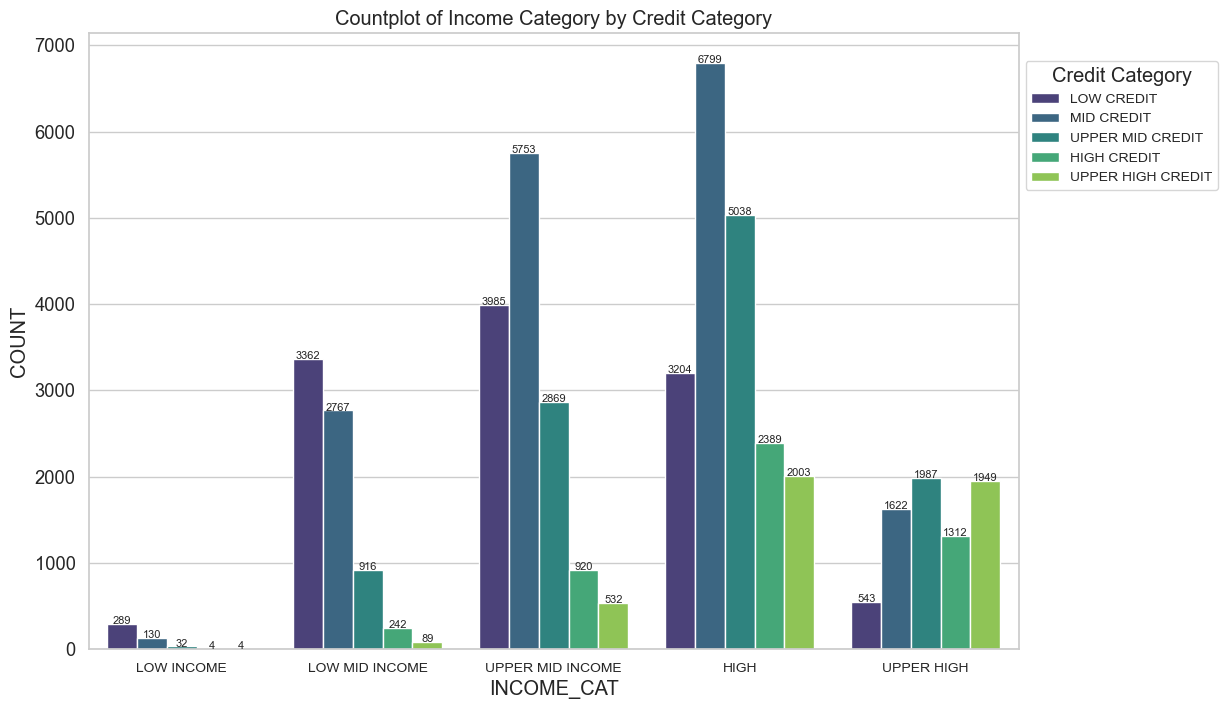

In [21]:
income_grp = df.groupby(['INCOME_CAT', 'CREDIT_CAT'])['CREDIT_CAT'].count().reset_index(name='COUNT')

credit_cat_order = ['LOW CREDIT', 'MID CREDIT', 'UPPER MID CREDIT', 'HIGH CREDIT', 'UPPER HIGH CREDIT']

income_grp['CREDIT_CAT'] = pd.Categorical(income_grp['CREDIT_CAT'], categories=credit_cat_order, ordered=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='INCOME_CAT', y='COUNT', hue='CREDIT_CAT', data=income_grp, palette='viridis',
                order=['LOW INCOME','LOW MID INCOME', 'UPPER MID INCOME','HIGH','UPPER HIGH'])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), title='Credit Category', fontsize=10)

plt.title('Countplot of Income Category by Credit Category')
ax.tick_params(axis='x', labelsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='baseline', fontsize=8)

plt.show();

In [22]:
df.AGE_CAT.value_counts()

AGE_CAT
THIRTIES           13105
FOURTIES           12479
FIFTIES            10560
TWENTIES            6852
SIXTIES & ABOVE     5744
Name: count, dtype: int64

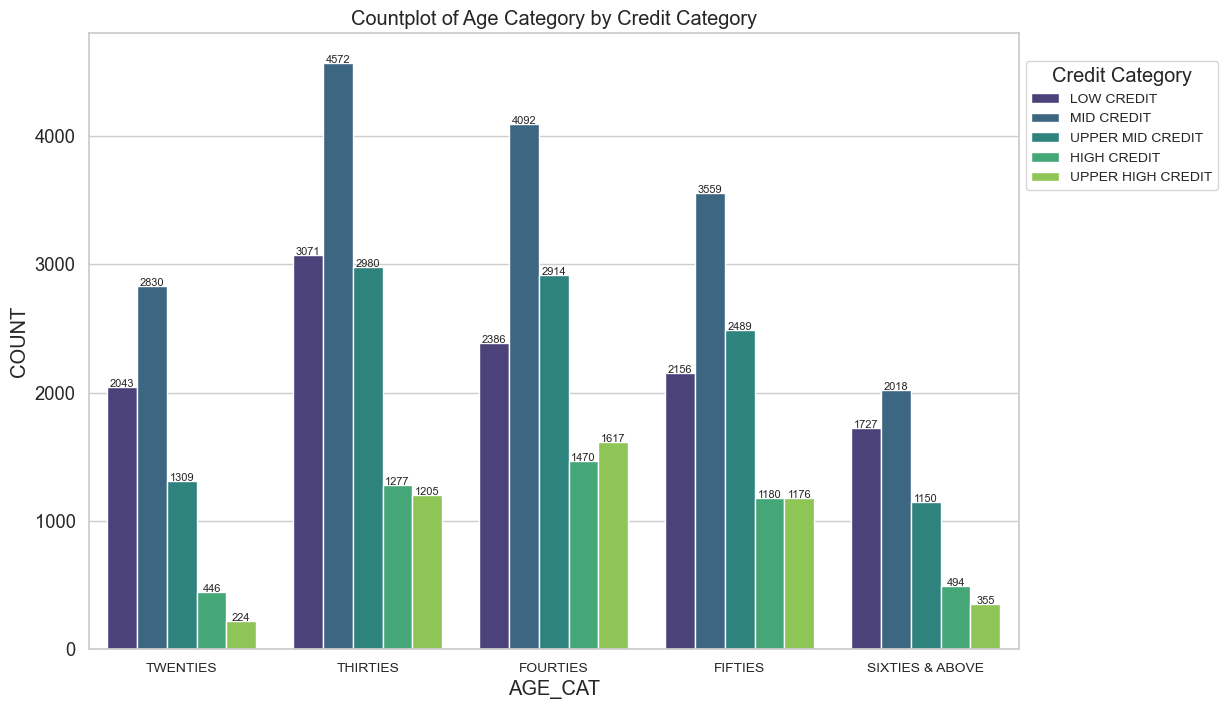

In [23]:
age_grouped = df.groupby(['AGE_CAT', 'CREDIT_CAT'])['CREDIT_CAT'].count().reset_index(name='COUNT')

age_cat_order = ['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE']

age_grouped['CREDIT_CAT'] = pd.Categorical(age_grouped['CREDIT_CAT'], categories=credit_cat_order, ordered=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='AGE_CAT', y='COUNT', hue='CREDIT_CAT', data=age_grouped, palette='viridis',
                order=['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE'])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), title='Credit Category', fontsize=10)

plt.title('Countplot of Age Category by Credit Category')
ax.tick_params(axis='x', labelsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='baseline', fontsize=8)

plt.show();

In [24]:
df[(df['INCOME_CAT'] == 'LOW INCOME') & (df['CREDIT_CAT'] == 'UPPER HIGH CREDIT')]

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
6402       146824         Cash loans           F            N               N   
7464       154731         Cash loans           F            N               Y   
7492       154922         Cash loans           F            N               Y   
39198      388848         Cash loans           F            N               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
6402              1          36,000.0 1,096,020.0     52,726.5   
7464              0          45,000.0 1,303,200.0     46,939.5   
7492              0          45,000.0 1,169,532.0     42,138.0   
39198             1          45,000.0 1,024,740.0     43,416.0   

       AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
6402         900,000.0    Unaccompanied          Working   
7464       1,125,000.0    Unaccompanied        Pensioner   
7492         945,000.0  Spouse, partner          Working   
39198        900,000.0    Unaccompanied        Pensioner   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
6402                Higher education            Married  House / apartment   
7464   Secondary / secondary special            Married  House / apartment   
7492   Secondary / secondary special            Married  House / apartment   
39198               Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
6402                     0.010966       10597           2044   
7464                     0.006852       22134         365243   
7492                     0.006296       17841           2698   
39198                    0.025164       21929         365243   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
6402             1,374.0             1382          0.0           1   
7464            11,441.0             5016          0.0           1   
7492             9,799.0              762          0.0           1   
39198            6,844.0             5409          0.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
6402                1                1                 1           0   
7464                0                0                 1           0   
7492                1                0                 1           0   
39198               0                0                 1           1   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
6402            0  Cleaning staff              3.0                     2   
7464            0        Laborers              2.0                     3   
7492            0        Laborers              2.0                     3   
39198           0        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
6402                             2                  WEDNESDAY   
7464                             3                     SUNDAY   
7492                             3                     MONDAY   
39198                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
6402                        12                           0   
7464                         6                           0   
7492                        12                           0   
39198                       16                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
6402                            0                            0   
7464                            0                            0   
7492                            0                            0   
39198                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
6402                        0                       0   
7464                        0                       0   
7492                     

In [25]:
df[(df['INCOME_CAT'] == 'LOW INCOME') & (df['CREDIT_CAT'] == 'HIGH CREDIT')]

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
10621      177146         Cash loans           F            N               N   
15013      208166         Cash loans           F            N               N   
15848      214295         Cash loans           F            N               Y   
17537      227326         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
10621             2          33,300.0   796,320.0     25,686.0   
15013             3          45,000.0   810,000.0     26,127.0   
15848             0          38,700.0   781,920.0     33,259.5   
17537             0          45,000.0   898,735.5     46,017.0   

       AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
10621        630,000.0   Unaccompanied          Working   
15013        810,000.0   Unaccompanied          Working   
15848        675,000.0          Family        Pensioner   
17537        738,000.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
10621              Incomplete higher            Married  House / apartment   
15013  Secondary / secondary special            Married  House / apartment   
15848  Secondary / secondary special            Married  House / apartment   
17537               Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
10621          0.0096569999999999       13147           1243   
15013                    0.025164       14330           5139   
15848                    0.008625       20776         365243   
17537                    0.020713       12076           2163   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
10621            2,311.0             2228          0.0           1   
15013            3,829.0             5013          0.0           1   
15848            5,469.0             3068          0.0           1   
17537            1,749.0             3901          0.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
10621               1                1                 1           0   
15013               1                1                 1           0   
15848               0                0                 1           0   
17537               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
10621           0        Laborers              4.0                     2   
15013           0  Medicine staff              5.0                     2   
15848           0        Laborers              2.0                     2   
17537           0      Core staff              2.0                     3   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
10621                            2                   THURSDAY   
15013                            2                  WEDNESDAY   
15848                            2                  WEDNESDAY   
17537                            2                     MONDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
10621                       13                           0   
15013                       12                           0   
15848                       12                           0   
17537                        9                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
10621                           0                            0   
15013                           0                            0   
15848                           0                            0   
17537                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
10621                       0                       0   
15013                       0                       0   
15848                       0 

## Female as Risk Takers

In [26]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    32675
M    16065
Name: count, dtype: int64

In [27]:
# gender, age_cat, income_cat, credit_cat

# Set the order of 'AGE_CAT' before filtering
age_cat_order = ['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE']
income_cat_order = ['LOW INCOME', 'LOW MID INCOME', 'UPPER MID INCOME', 'HIGH', 'UPPER HIGH']

high_credit_f = df[(df['CREDIT_CAT'] == 'HIGH CREDIT') & (df['CODE_GENDER'] =='F')]
high_credit_f['AGE_CAT'] = pd.Categorical(high_credit_f['AGE_CAT'], categories=age_cat_order, ordered=True)
high_credit_f['INCOME_CAT'] = pd.Categorical(high_credit_f['INCOME_CAT'], categories=income_cat_order, ordered=True)

high_credit_f = high_credit_f.groupby(['AGE_CAT', 'INCOME_CAT'])['CREDIT_CAT'].count().reset_index(name='HIGH CREDIT FEMALE')

high_credit_f


AGE_CAT        INCOME_CAT  HIGH CREDIT FEMALE
0          TWENTIES        LOW INCOME                   0
1          TWENTIES    LOW MID INCOME                  11
2          TWENTIES  UPPER MID INCOME                  69
3          TWENTIES              HIGH                 123
4          TWENTIES        UPPER HIGH                  43
5          THIRTIES        LOW INCOME                   3
6          THIRTIES    LOW MID INCOME                  54
7          THIRTIES  UPPER MID INCOME                 176
8          THIRTIES              HIGH                 396
9          THIRTIES        UPPER HIGH                 185
10         FOURTIES        LOW INCOME                   0
11         FOURTIES    LOW MID INCOME                  58
12         FOURTIES  UPPER MID INCOME                 219
13         FOURTIES              HIGH                 472
14         FOURTIES        UPPER HIGH                 227
15          FIFTIES        LOW INCOME                   1
16          FIFTIES    LOW MID INCOME                  56
17          FIFTIES  UPPER MID INCOME                 216
18          FIFTIES              HIGH                 414
19          FIFTIES        UPPER HIGH                 183
20  SIXTIES & ABOVE        LOW INCOME                   0
21  SIXTIES & ABOVE    LOW MID INCOME                  40
22  SIXTIES & ABOVE  UPPER MID INCOME                  83
23  SIXTIES & ABOVE              HIGH                 195
24  SIXTIES & ABOVE        UPPER HIGH                  63

In [28]:
# gender, age_cat, income_cat, credit_cat

# Set the order of 'AGE_CAT' before filtering
age_cat_order = ['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE']
income_cat_order = ['LOW INCOME', 'LOW MID INCOME', 'UPPER MID INCOME', 'HIGH', 'UPPER HIGH']

high_credit_m = df[(df['CREDIT_CAT'] == 'HIGH CREDIT') & (df['CODE_GENDER'] =='M')]
high_credit_m['AGE_CAT'] = pd.Categorical(high_credit_m['AGE_CAT'], categories=age_cat_order, ordered=True)
high_credit_m['INCOME_CAT'] = pd.Categorical(high_credit_m['INCOME_CAT'], categories=income_cat_order, ordered=True)

high_credit_m = high_credit_m.groupby(['AGE_CAT', 'INCOME_CAT'])['CREDIT_CAT'].count().reset_index(name='HIGH CREDIT MALE')

high_credit_m


AGE_CAT        INCOME_CAT  HIGH CREDIT MALE
0          TWENTIES        LOW INCOME                 0
1          TWENTIES    LOW MID INCOME                 1
2          TWENTIES  UPPER MID INCOME                11
3          TWENTIES              HIGH               131
4          TWENTIES        UPPER HIGH                57
5          THIRTIES        LOW INCOME                 0
6          THIRTIES    LOW MID INCOME                 1
7          THIRTIES  UPPER MID INCOME                38
8          THIRTIES              HIGH               208
9          THIRTIES        UPPER HIGH               216
10         FOURTIES        LOW INCOME                 0
11         FOURTIES    LOW MID INCOME                 3
12         FOURTIES  UPPER MID INCOME                47
13         FOURTIES              HIGH               239
14         FOURTIES        UPPER HIGH               205
15          FIFTIES        LOW INCOME                 0
16          FIFTIES    LOW MID INCOME                 8
17          FIFTIES  UPPER MID INCOME                39
18          FIFTIES              HIGH               150
19          FIFTIES        UPPER HIGH               113
20  SIXTIES & ABOVE        LOW INCOME                 0
21  SIXTIES & ABOVE    LOW MID INCOME                10
22  SIXTIES & ABOVE  UPPER MID INCOME                22
23  SIXTIES & ABOVE              HIGH                61
24  SIXTIES & ABOVE        UPPER HIGH                20

In [29]:
high_credit = pd.merge(high_credit_m, high_credit_f, on=['AGE_CAT','INCOME_CAT'])
high_credit

AGE_CAT        INCOME_CAT  HIGH CREDIT MALE  HIGH CREDIT FEMALE
0          TWENTIES        LOW INCOME                 0                   0
1          TWENTIES    LOW MID INCOME                 1                  11
2          TWENTIES  UPPER MID INCOME                11                  69
3          TWENTIES              HIGH               131                 123
4          TWENTIES        UPPER HIGH                57                  43
5          THIRTIES        LOW INCOME                 0                   3
6          THIRTIES    LOW MID INCOME                 1                  54
7          THIRTIES  UPPER MID INCOME                38                 176
8          THIRTIES              HIGH               208                 396
9          THIRTIES        UPPER HIGH               216                 185
10         FOURTIES        LOW INCOME                 0                   0
11         FOURTIES    LOW MID INCOME                 3                  58
12         FOURTIES  UPPER MID INCOME                47                 219
13         FOURTIES              HIGH               239                 472
14         FOURTIES        UPPER HIGH               205                 227
15          FIFTIES        LOW INCOME                 0                   1
16          FIFTIES    LOW MID INCOME                 8                  56
17          FIFTIES  UPPER MID INCOME                39                 216
18          FIFTIES              HIGH               150                 414
19          FIFTIES        UPPER HIGH               113                 183
20  SIXTIES & ABOVE        LOW INCOME                 0                   0
21  SIXTIES & ABOVE    LOW MID INCOME                10                  40
22  SIXTIES & ABOVE  UPPER MID INCOME                22                  83
23  SIXTIES & ABOVE              HIGH                61                 195
24  SIXTIES & ABOVE        UPPER HIGH                20                  63

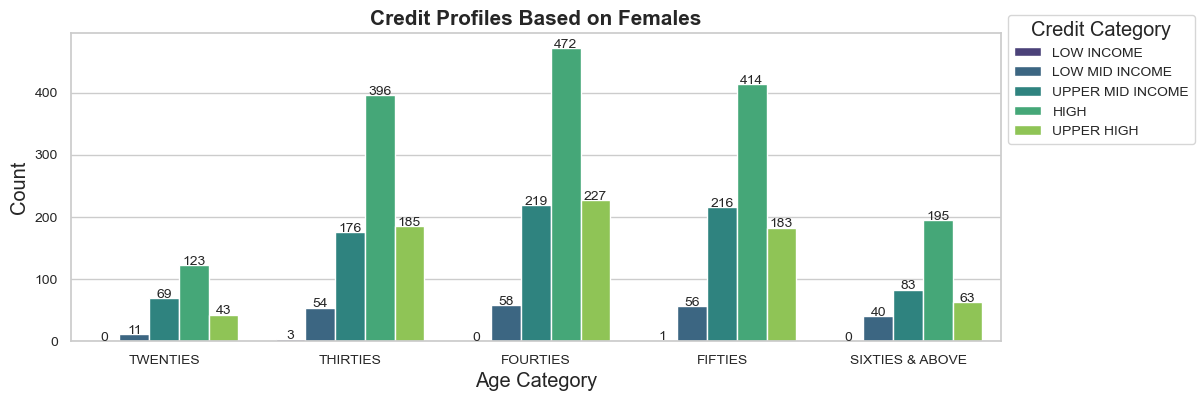

In [30]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='AGE_CAT', y='HIGH CREDIT FEMALE', hue='INCOME_CAT', data=high_credit, palette='viridis',
            order=age_cat_order)

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                       ha='center', va='baseline', fontsize=10)

plt.title('Credit Profiles Based on Females', weight='bold', fontsize=15)
plt.xlabel('Age Category')
plt.ylabel('Count')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), title='Credit Category', fontsize=10)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show();

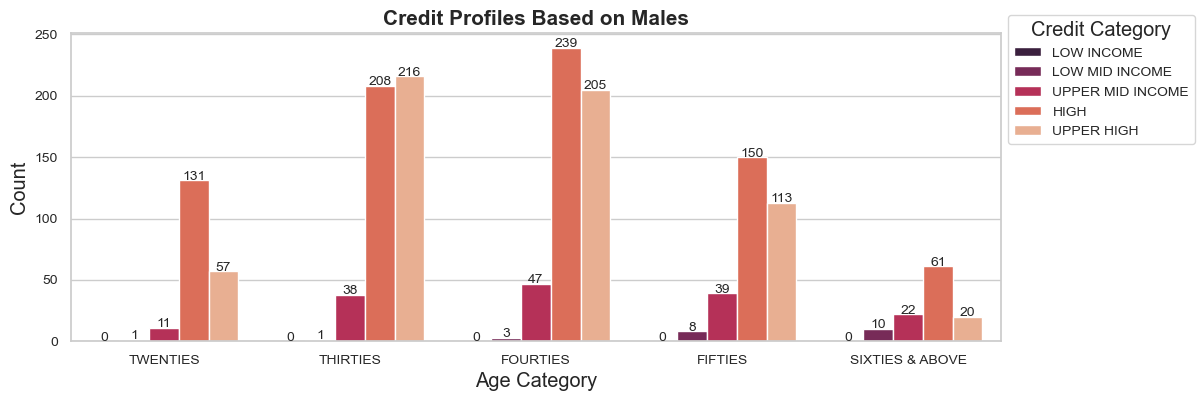

In [31]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='AGE_CAT', y='HIGH CREDIT MALE', hue='INCOME_CAT', data=high_credit, palette='rocket',
            order=age_cat_order)

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                       ha='center', va='baseline', fontsize=10)

plt.title('Credit Profiles Based on Males', weight='bold', fontsize=15)
plt.xlabel('Age Category')
plt.ylabel('Count')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), title='Credit Category', fontsize=10)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show();

## Occupation Type

In [32]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 24257
Sales staff               5072
Core staff                4361
Managers                  3574
Drivers                   2773
High skill tech staff     1854
Accountants               1628
Medicine staff            1316
Security staff             915
Cooking staff              894
Cleaning staff             656
Private service staff      455
Low-skill Laborers         272
Secretaries                212
Waiters/barmen staff       178
Realty agents              138
HR staff                   104
IT staff                    81
Name: count, dtype: int64

In [33]:
# gender, age_cat, income_cat, credit_cat

# Set the order of 'AGE_CAT' before filtering
age_cat_order = ['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE']
income_cat_order = ['LOW INCOME', 'LOW MID INCOME', 'UPPER MID INCOME', 'HIGH', 'UPPER HIGH']

high_credit_f = df[(df['CREDIT_CAT'] == 'HIGH CREDIT') & (df['CODE_GENDER'] =='F')]
high_credit_f['AGE_CAT'] = pd.Categorical(high_credit_f['AGE_CAT'], categories=age_cat_order, ordered=True)
high_credit_f['INCOME_CAT'] = pd.Categorical(high_credit_f['INCOME_CAT'], categories=income_cat_order, ordered=True)

high_credit_f = high_credit_f.groupby(['AGE_CAT', 'INCOME_CAT'])['CREDIT_CAT'].count().reset_index(name='HIGH CREDIT FEMALE')

high_credit_f


AGE_CAT        INCOME_CAT  HIGH CREDIT FEMALE
0          TWENTIES        LOW INCOME                   0
1          TWENTIES    LOW MID INCOME                  11
2          TWENTIES  UPPER MID INCOME                  69
3          TWENTIES              HIGH                 123
4          TWENTIES        UPPER HIGH                  43
5          THIRTIES        LOW INCOME                   3
6          THIRTIES    LOW MID INCOME                  54
7          THIRTIES  UPPER MID INCOME                 176
8          THIRTIES              HIGH                 396
9          THIRTIES        UPPER HIGH                 185
10         FOURTIES        LOW INCOME                   0
11         FOURTIES    LOW MID INCOME                  58
12         FOURTIES  UPPER MID INCOME                 219
13         FOURTIES              HIGH                 472
14         FOURTIES        UPPER HIGH                 227
15          FIFTIES        LOW INCOME                   1
16          FIFTIES    LOW MID INCOME                  56
17          FIFTIES  UPPER MID INCOME                 216
18          FIFTIES              HIGH                 414
19          FIFTIES        UPPER HIGH                 183
20  SIXTIES & ABOVE        LOW INCOME                   0
21  SIXTIES & ABOVE    LOW MID INCOME                  40
22  SIXTIES & ABOVE  UPPER MID INCOME                  83
23  SIXTIES & ABOVE              HIGH                 195
24  SIXTIES & ABOVE        UPPER HIGH                  63

In [34]:
age_cat_order    = ['TWENTIES', 'THIRTIES', 'FOURTIES', 'FIFTIES', 'SIXTIES & ABOVE']
income_cat_order = ['LOW INCOME', 'LOW MID INCOME', 'UPPER MID INCOME', 'HIGH', 'UPPER HIGH']
credit_cat_order = ['LOW CREDIT', 'MID CREDIT', 'UPPER MID CREDIT', 'HIGH CREDIT', 'UPPER HIGH CREDIT']

occu_credit_high_f = df[(df['CREDIT_CAT'] == 'HIGH CREDIT') & (df['CODE_GENDER'] =='F')]
occu_credit_high_f['OCCUPATION_TYPE'] = pd.Categorical(occu_credit_high_f['OCCUPATION_TYPE'], categories=credit_cat_order, ordered=True)
occu_credit_high_f = occu_credit_high_f.groupby(['OCCUPATION_TYPE','INCOME_CAT'])['CREDIT_CAT'].count().reset_index(name='OCCUPATION')

In [35]:
# education, occupation_type, income_cat, credit_cat

education_order = ['Lower secondary','Incomplete higher','Higher education','Academic degree']

edf = df[(df['CODE_GENDER'] == 'F') & (df['NAME_EDUCATION_TYPE'])]['NAME_EDUCATION_TYPE'].value_counts()
edm = df[(df['CODE_GENDER'] == 'M') & (df['NAME_EDUCATION_TYPE'])]['NAME_EDUCATION_TYPE'].value_counts()


df.shape

edf
edm


df.NAME_EDUCATION_TYPE.value_counts()

(48740, 81)

NAME_EDUCATION_TYPE
Secondary / secondary special    22621
Higher education                  8741
Incomplete higher                  998
Lower secondary                    288
Academic degree                     27
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    11365
Higher education                  3773
Incomplete higher                  726
Lower secondary                    187
Academic degree                     14
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    33986
Higher education                 12514
Incomplete higher                 1724
Lower secondary                    475
Academic degree                     41
Name: count, dtype: int64

# Handling Outliers

In [36]:
# Checking Outliers

# Identify columns with data types that are not 'object' (categorical) and not 'bool' (boolean)
numerical_columns = df.select_dtypes(exclude=['object', 'bool']).columns

numerical_df = df[numerical_columns]

desc_df = numerical_df.describe().round(2)
desc_df = desc_df.T

desc_df['nunique'] = 0  # kolom nunique

for col in numerical_columns:
    nunique = numerical_df[col].nunique()
    
    desc_df.at[col, 'nunique'] = nunique

desc_df['iqr']     = (desc_df['75%'] - desc_df['25%']).round(2)
desc_df['lowt']    = (desc_df['25%'] - (1.5 * desc_df['iqr'])).round(2)
desc_df['hit']     = (desc_df['75%'] + (1.5 * desc_df['iqr']))
desc_df['out_low'] = desc_df['min'] < desc_df['lowt']
desc_df['out_hi']  = desc_df['max'] > desc_df['hit']

desc_df['outliers_low_count'] = 0  # jumlah outliers bawah
desc_df['outliers_hi_count']  = 0  # jumlah outliers atas

for col in numerical_columns:
    lower_outliers = (numerical_df[col] < desc_df.loc[col, 'lowt']).sum()
    
    upper_outliers = (numerical_df[col] > desc_df.loc[col, 'hit']).sum()
    
    desc_df.at[col, 'outliers_low_count'] = lower_outliers
    desc_df.at[col, 'outliers_hi_count'] = upper_outliers

desc_df = desc_df.sort_values(by='nunique', ascending=True)
desc_df

count       mean        std       min  \
FLAG_DOCUMENT_4             48,740.0        0.0       0.01       0.0   
REG_CITY_NOT_LIVE_CITY      48,740.0       0.08       0.27       0.0   
LIVE_REGION_NOT_WORK_REGION 48,740.0       0.04        0.2       0.0   
REG_REGION_NOT_WORK_REGION  48,740.0       0.06       0.23       0.0   
REG_REGION_NOT_LIVE_REGION  48,740.0       0.02       0.14       0.0   
FLAG_DOCUMENT_9             48,740.0        0.0       0.07       0.0   
FLAG_DOCUMENT_3             48,740.0       0.79       0.41       0.0   
FLAG_EMAIL                  48,740.0       0.16       0.37       0.0   
FLAG_PHONE                  48,740.0       0.26       0.44       0.0   
FLAG_CONT_MOBILE            48,740.0        1.0       0.04       0.0   
FLAG_WORK_PHONE             48,740.0        0.2        0.4       0.0   
REG_CITY_NOT_WORK_CITY      48,740.0       0.22       0.42       0.0   
FLAG_EMP_PHONE              48,740.0       0.81       0.39       0.0   
FLAG_DOCUMENT_11            48,740.0        0.0       0.03       0.0   
FLAG_DOCUMENT_18            48,740.0        0.0       0.04       0.0   
FLAG_DOCUMENT_8             48,740.0       0.09       0.28       0.0   
FLAG_DOCUMENT_7             48,740.0        0.0       0.01       0.0   
FLAG_DOCUMENT_6             48,740.0       0.09       0.28       0.0   
FLAG_DOCUMENT_5             48,740.0       0.01       0.12       0.0   
FLAG_MOBIL                  48,740.0        1.0        0.0       0.0   
LIVE_CITY_NOT_WORK_CITY     48,740.0       0.17       0.38       0.0   
AMT_REQ_CREDIT_BUREAU_HOUR  48,740.0        0.0       0.04       0.0   
AMT_REQ_CREDIT_BUREAU_DAY   48,740.0        0.0       0.04       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  48,740.0        0.0       0.05       0.0   
REGION_RATING_CLIENT        48,740.0       2.04       0.52       1.0   
REGION_RATING_CLIENT_W_CITY 48,740.0       2.01       0.52      -1.0   
AMT_REQ_CREDIT_BUREAU_MON   48,740.0       0.01        0.1       0.0   
DEF_60_CNT_SOCIAL_CIRCLE    48,740.0        0.1        0.4       0.0   
DEF_30_CNT_SOCIAL_CIRCLE    48,740.0       0.14       0.51       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   48,740.0       0.48       0.67       0.0   
CNT_CHILDREN                48,740.0        0.4       0.71       0.0   
YEAR_LAST_PHONE_CHANGE      48,740.0        2.5       2.34       0.0   
CNT_FAM_MEMBERS             48,740.0       2.15       0.89       1.0   
AMT_REQ_CREDIT_BUREAU_YEAR  48,740.0       1.99       1.72       0.0   
YEAR_ID_PUBLISH             48,740.0       7.85        4.3       0.0   
HOUR_APPR_PROCESS_START     48,740.0      12.01       3.28       0.0   
OBS_60_CNT_SOCIAL_CIRCLE    48,740.0       1.43       3.58       0.0   
OBS_30_CNT_SOCIAL_CIRCLE    48,740.0       1.45       3.61       0.0   
YEAR_CREDIT_DURATION        48,740.0      16.64        6.3       3.0   
YEAR_EMPLOYMENT             48,740.0     195.35     390.08       0.0   
AGE                         48,740.0      43.53      11.85      20.0   
OWN_CAR_AGE                 48,740.0       3.97       8.68       0.0   
YEAR_REGISTRATION           48,740.0      13.11       9.73       0.0   
REGION_POPULATION_RELATIVE  48,740.0       0.02       0.01       0.0   
AMT_INTEREST_RATE%          48,740.0      13.19      12.46       0.0   
GOODS_CREDIT_RATIO%         48,740.0      89.35       9.26      25.0   
CREDIT_ANNUITY_RATIO%       48,740.0       6.66       2.46      1.54   
ANNUITY_TO_CREDIT%          48,740.0       6.66       2.46      1.54   
AMT_INCOME_TOTAL            48,740.0  178,436.2 101,525.12  26,941.5   
AMT_GOODS_PRICE             48,740.0 462,626.34 336,711.62  45,000.0   
EXT_SOURCE_3                48,740.0        0.5       0.17       0.0   
CUR%                        48,740.0       3.17       2.14      0.09   
AMT_INTEREST_PAID           48,740.0  54,135.73  61,308.83       0.0   
AMT_CREDIT                  48,740.0 516,762.07 365,400.06  45,000.0   
DAYS_LAST_PHONE_CHANGE      48,740.0   1,077.74     878.95       0.0   

In [37]:
do = df.copy()

qn = 0.86

do = do[do['AMT_INCOME_TOTAL'] <= df['AMT_INCOME_TOTAL'].quantile(qn)]
do = do[do['AMT_CREDIT']       <= df['AMT_CREDIT'].quantile(qn)]
do = do[do['AMT_ANNUITY']      <= df['AMT_ANNUITY'].quantile(qn)]
do = do[do['AMT_GOODS_PRICE']  <= df['AMT_GOODS_PRICE'].quantile(qn)]

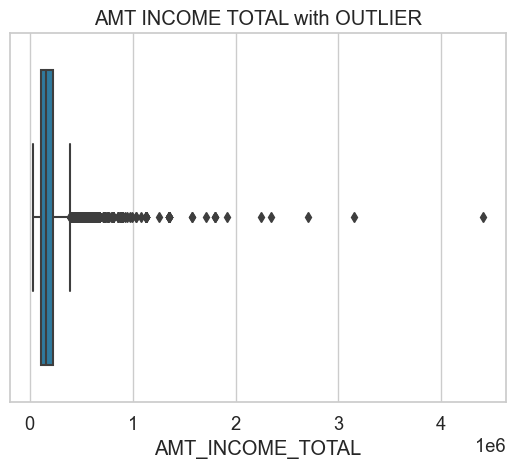

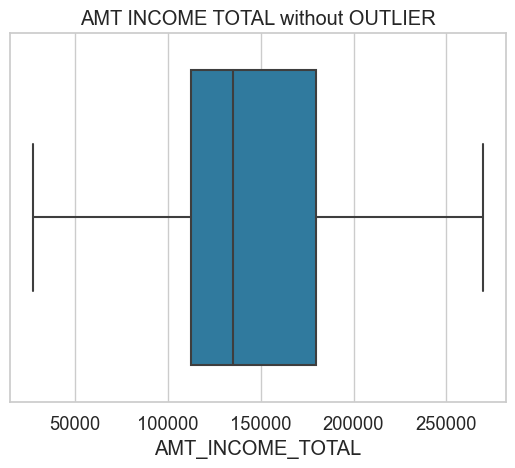

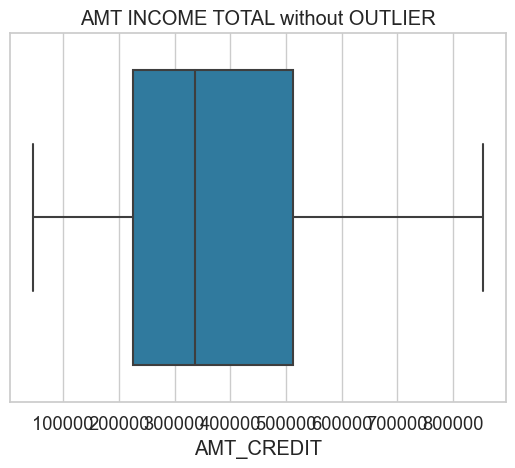

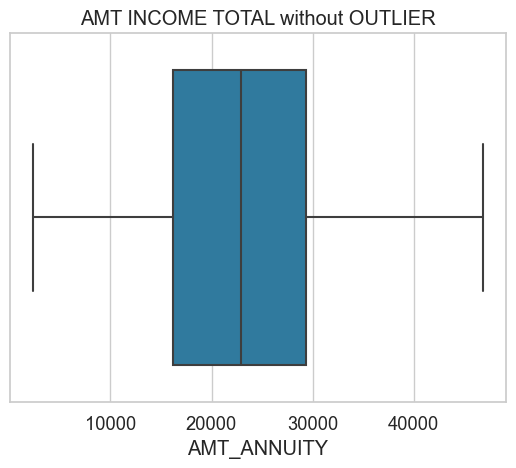

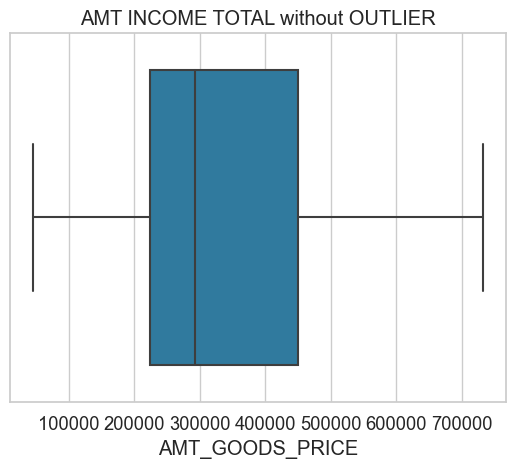

In [38]:
sns.boxplot(df, x='AMT_INCOME_TOTAL')
plt.title("AMT INCOME TOTAL with OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_INCOME_TOTAL')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_CREDIT')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_ANNUITY')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_GOODS_PRICE')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

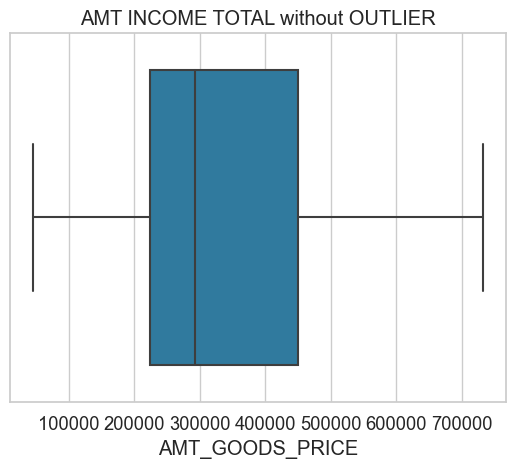

In [39]:
sns.boxplot(do, x='AMT_GOODS_PRICE')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

In [40]:
df.shape
do.shape

(48740, 81)

(36452, 81)

In [41]:
do.head(2)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   
1             0          99,000.0   222,768.0     17,370.0        180,000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                     0.01885   
1            Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       19241           2329            5,170.0              812          0.0   
1       18064           4469            9,118.0             1623          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1            Laborers              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   

  ORGANIZATION_TYPE       EXT_SOURCE_1       EXT_SOURCE_2       EXT_SOURCE_3  \
0      Kindergarten 0.7526144906031748 0.7896543511176771 0.1595195404777181   
1     Self-employed 0.5649902017969249 0.2916555320093651 0.4329616670974407   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 1,740.0   
1                       0.0                       0.0                     0.0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_11  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_18  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  \
0                        0.0       

# Features Selection & Encoders

In [42]:
dus = do.copy()

In [43]:
features = dus.columns

In [44]:
from sklearn.preprocessing import LabelEncoder

list_object = dus.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    dus[col] = encoder.fit_transform(dus[col].values.tolist())

In [45]:
num_f = dus.select_dtypes(include=['integer','float']).columns.drop(['SK_ID_CURR'])
cat_f = dus.select_dtypes(include=['object']).columns

In [46]:
fta = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OWN_CAR_AGE', 'FLAG_MOBIL','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE', 'YEAR_EMPLOYMENT','YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
       'YEAR_LAST_PHONE_CHANGE','DTI%', 'CUR%', 'PRICE_TO_INCOME%', 
       'ANNUITY_TO_CREDIT%', 'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 
       'GOODS_CREDIT_RATIO%', 'AMT_INTEREST_PAID', 'AMT_INTEREST_RATE%', 
       'YEAR_CREDIT_DURATION']

ftb = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 
       'AGE', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
       'YEAR_LAST_PHONE_CHANGE','DTI%', 'CUR%', 'PRICE_TO_INCOME%', 
       'ANNUITY_TO_CREDIT%', 'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 
       'GOODS_CREDIT_RATIO%', 'AMT_INTEREST_PAID', 'AMT_INTEREST_RATE%', 
       'YEAR_CREDIT_DURATION']

ftc = ['DTI%', 'CUR%','PRICE_TO_INCOME%', 'ANNUITY_TO_CREDIT%',
       'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 'GOODS_CREDIT_RATIO%']

In [47]:
clean_df = dus[ftb]

# clean_df = dus[featx]
clean_df.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0         135,000.0   568,800.0     20,560.5        450,000.0   52   
1          99,000.0   222,768.0     17,370.0        180,000.0   49   
4         180,000.0   625,500.0     32,067.0        625,500.0   35   
6         180,000.0   499,221.0     22,117.5        373,500.0   45   
7         166,500.0   180,000.0     14,220.0        180,000.0   26   

   YEAR_REGISTRATION  YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE  DTI%  CUR%  \
0               14.0                2                     4.0 15.23  4.21   
1               24.0                4                     0.0 17.55  2.25   
4               10.0               11                     2.0 17.82  3.48   
6               27.0                0                     3.0 12.29  2.77   
7               13.0                5                     3.0  8.54  1.08   

   PRICE_TO_INCOME%  ANNUITY_TO_CREDIT%  INCOME_CREDIT_RATIO%  \
0            333.33                3.61                 23.73   
1            181.82                 7.8                 44.44   
4             347.5                5.13                 28.78   
6             207.5                4.43                 36.06   
7            108.11                 7.9                  92.5   

   CREDIT_ANNUITY_RATIO%  GOODS_CREDIT_RATIO%  AMT_INTEREST_PAID  \
0                   3.61                79.11          118,800.0   
1                    7.8                 80.8           42,768.0   
4                   5.13                100.0                0.0   
6                   4.43                74.82          125,721.0   
7                    7.9                100.0                0.0   

   AMT_INTEREST_RATE%  YEAR_CREDIT_DURATION  
0                26.4                  27.0  
1               23.76                  12.0  
4                 0.0                  19.0  
6               33.66                  22.0  
7                 0.0                  12.0

# Scaler

In [48]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df_std = std.fit_transform(clean_df)
df_std

array([[-0.21905831,  1.01625411, -0.26986498, ...,  1.56427772,
         0.93459186,  2.07089935],
       [-0.89875331, -0.79504023, -0.61245472, ..., -0.0422526 ,
         0.73261403, -0.67569895],
       [ 0.63056045,  1.3130486 ,  0.9656808 , ..., -0.94592591,
        -1.08518637,  0.60604692],
       ...,
       [ 1.05536983, -0.31225453,  1.08793073, ..., -0.94592591,
        -1.08518637, -1.2250186 ],
       [ 1.48017921,  0.394399  ,  0.22058436, ..., -0.94592591,
        -1.08518637,  0.23983382],
       [-0.21905831, -0.32393787,  0.17564664, ..., -0.0422526 ,
         0.12668057, -0.67569895]])

In [49]:
df_stdf = pd.DataFrame(df_std, columns = clean_df.columns)
df_stdf.head()

AMT_INCOME_TOTAL          AMT_CREDIT          AMT_ANNUITY  \
0 -0.2190583053763798  1.0162541111439944 -0.26986498235589573   
1 -0.8987533114365653 -0.7950402274187751  -0.6124547197399718   
2   0.630560452198852   1.313048595459055   0.9656807983085364   
3   0.630560452198852  0.6520448796773701 -0.10267732490188966   
4  0.3756748249262825 -1.0189080670164208  -0.9506956452249551   

     AMT_GOODS_PRICE                 AGE     YEAR_REGISTRATION  \
0 0.7140718143593803  0.6840028332745317     0.061053982699008   
1 -0.891062555384933  0.4401391695869333    1.0810547972845719   
2 1.7574091546931838 -0.6978912609551924   -0.3469463431352176   
3 0.2592837429318248  0.1149876180034688    1.3870550416602412   
4 -0.891062555384933 -1.4294822520179875 -0.040946098759548404   

      YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE                 DTI%  \
0 -1.3826646007778935      0.6984551817082807 -0.23584433983645609   
1 -0.9155398692998427      -1.043835127169448 0.043583125175517226   
2  0.7193966908733355    -0.17268997273058356  0.07610270084501407   
3 -1.8497893322559444      0.2628826044888486  -0.5899463860154224   
4 -0.6819775035608172      0.2628826044888486   -1.041607159202879   

                   CUR%    PRICE_TO_INCOME%  ANNUITY_TO_CREDIT%  \
0    0.8384030632027496  0.5829770601326174  -1.390566534452281   
1   -0.3231425631928357 -0.4313315271290383 0.36977258428874993   
2   0.40578657990235306  0.6778404531858658 -0.7519709591572054   
3 -0.014977397006251806 -0.2594125480459459  -1.046061026727306   
4   -1.0165141871126493  -0.924795232277587 0.41178545108447884   

   INCOME_CREDIT_RATIO%  CREDIT_ANNUITY_RATIO%  GOODS_CREDIT_RATIO%  \
0   -0.7124359729108862     -1.390566534452281  -0.9929454188582488   
1  -0.19031742775020236    0.36977258428874993  -0.8173432771535908   
2      -0.5851207313338    -0.7519709591572054   1.1776633031596877   
3  -0.40158509595138675     -1.046061026727306  -1.4387047016469976   
4    1.0213202970408393    0.41178545108447884   1.1776633031596877   

     AMT_INTEREST_PAID  AMT_INTEREST_RATE%  YEAR_CREDIT_DURATION  
0   1.5642777224157096  0.9345918574678801     2.070899346744297  
1 -0.04225260396740514  0.7326140349695409   -0.6756989451622356  
2  -0.9459259125579073 -1.0851863675155133    0.6060469243941463  
3   1.7105161008471272   1.490030869338313     1.155366582775453  
4  -0.9459259125579073 -1.0851863675155133   -0.6756989451622356

# K-Means

In [50]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_stdf)
    inertia.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

# Elbow Method

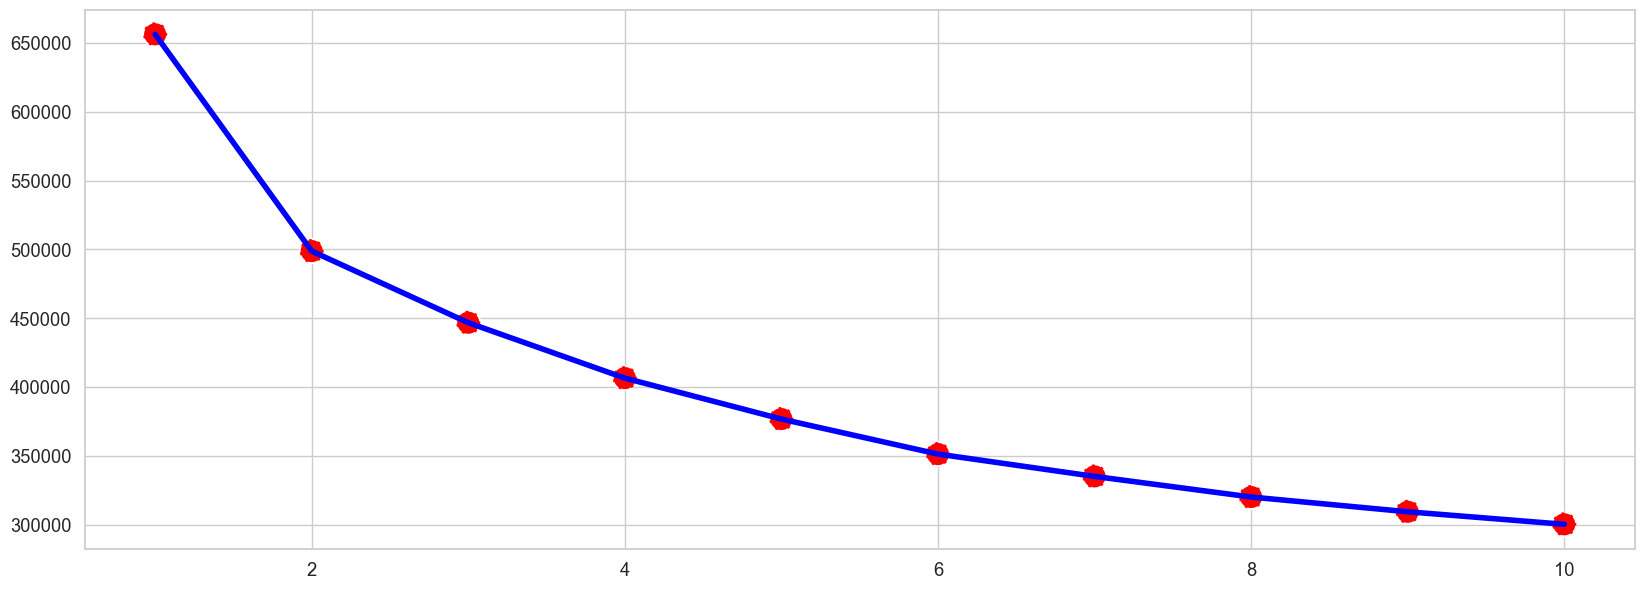

In [51]:
# lihat inertia plot untuk menentukan jumlah cluster

plt.figure(figsize=(20,7))

sns.lineplot(x=range(1,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(1,11), y = inertia, s = 300, color = 'red', linestyle = '--')
plt.show();

In [52]:
inertia

[656135.9999999986,
 498800.26392439357,
 446818.3875413221,
 406620.79025989893,
 376904.10916451825,
 351480.3316793254,
 335279.7421076489,
 320322.26390491956,
 309616.16007808887,
 300516.24575354636]

In [53]:
# clustering
n_clusters = 3


kmeans = KMeans(n_clusters = n_clusters, random_state = 0)

# fit model
kc = kmeans.fit(df_stdf)
cluster_labels = kc.labels_

# add cluster
datacust_cluster = df_stdf.assign(K_Cluster = cluster_labels)
datacust_cluster.head()

AMT_INCOME_TOTAL          AMT_CREDIT          AMT_ANNUITY  \
0 -0.2190583053763798  1.0162541111439944 -0.26986498235589573   
1 -0.8987533114365653 -0.7950402274187751  -0.6124547197399718   
2   0.630560452198852   1.313048595459055   0.9656807983085364   
3   0.630560452198852  0.6520448796773701 -0.10267732490188966   
4  0.3756748249262825 -1.0189080670164208  -0.9506956452249551   

     AMT_GOODS_PRICE                 AGE     YEAR_REGISTRATION  \
0 0.7140718143593803  0.6840028332745317     0.061053982699008   
1 -0.891062555384933  0.4401391695869333    1.0810547972845719   
2 1.7574091546931838 -0.6978912609551924   -0.3469463431352176   
3 0.2592837429318248  0.1149876180034688    1.3870550416602412   
4 -0.891062555384933 -1.4294822520179875 -0.040946098759548404   

      YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE                 DTI%  \
0 -1.3826646007778935      0.6984551817082807 -0.23584433983645609   
1 -0.9155398692998427      -1.043835127169448 0.043583125175517226   
2  0.7193966908733355    -0.17268997273058356  0.07610270084501407   
3 -1.8497893322559444      0.2628826044888486  -0.5899463860154224   
4 -0.6819775035608172      0.2628826044888486   -1.041607159202879   

                   CUR%    PRICE_TO_INCOME%  ANNUITY_TO_CREDIT%  \
0    0.8384030632027496  0.5829770601326174  -1.390566534452281   
1   -0.3231425631928357 -0.4313315271290383 0.36977258428874993   
2   0.40578657990235306  0.6778404531858658 -0.7519709591572054   
3 -0.014977397006251806 -0.2594125480459459  -1.046061026727306   
4   -1.0165141871126493  -0.924795232277587 0.41178545108447884   

   INCOME_CREDIT_RATIO%  CREDIT_ANNUITY_RATIO%  GOODS_CREDIT_RATIO%  \
0   -0.7124359729108862     -1.390566534452281  -0.9929454188582488   
1  -0.19031742775020236    0.36977258428874993  -0.8173432771535908   
2      -0.5851207313338    -0.7519709591572054   1.1776633031596877   
3  -0.40158509595138675     -1.046061026727306  -1.4387047016469976   
4    1.0213202970408393    0.41178545108447884   1.1776633031596877   

     AMT_INTEREST_PAID  AMT_INTEREST_RATE%  YEAR_CREDIT_DURATION  K_Cluster  
0   1.5642777224157096  0.9345918574678801     2.070899346744297          0  
1 -0.04225260396740514  0.7326140349695409   -0.6756989451622356          1  
2  -0.9459259125579073 -1.0851863675155133    0.6060469243941463          2  
3   1.7105161008471272   1.490030869338313     1.155366582775453          0  
4  -0.9459259125579073 -1.0851863675155133   -0.6756989451622356          1

In [54]:
# add cluster to df_cust
cust_cluster = do.assign(K_Cluster = cluster_labels)
cust_cluster.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
4      100038         Cash loans           M            Y               N   
6      100057         Cash loans           M            Y               Y   
7      100065         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   
1             0          99,000.0   222,768.0     17,370.0        180,000.0   
4             1         180,000.0   625,500.0     32,067.0        625,500.0   
6             2         180,000.0   499,221.0     22,117.5        373,500.0   
7             0         166,500.0   180,000.0     14,220.0        180,000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   
6   Unaccompanied          Working               Higher education   
7   Unaccompanied          Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                     0.01885   
1               Married  House / apartment                    0.035792   
4               Married  House / apartment                    0.010032   
6               Married  House / apartment                      0.0228   
7  Single / not married       With parents                    0.005144   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       19241           2329            5,170.0              812          0.0   
1       18064           4469            9,118.0             1623          0.0   
4       13040           2191            4,000.0             4262         16.0   
6       16685           2580           10,125.0              241          3.0   
7        9516           1387            5,063.0             2055          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
4           1               1                1                 1           0   
6           1               1                0                 1           0   
7           1               1                1                 1           1   

   FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1               Laborers              2.0                     2   
1           0     Low-skill Laborers              2.0                     2   
4           0               Laborers              3.0                     2   
6           0  High skill tech staff              4.0                     2   
7           0             Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
4                            2                     FRIDAY   
6                            2                   THURSDAY   
7                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
4                        5                           0   
6                        9                           0   
7                        7                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(datacust_cluster, cluster_labels)  # 'labels' adalah hasil dari algoritma pengelompokan
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.20206511192664733


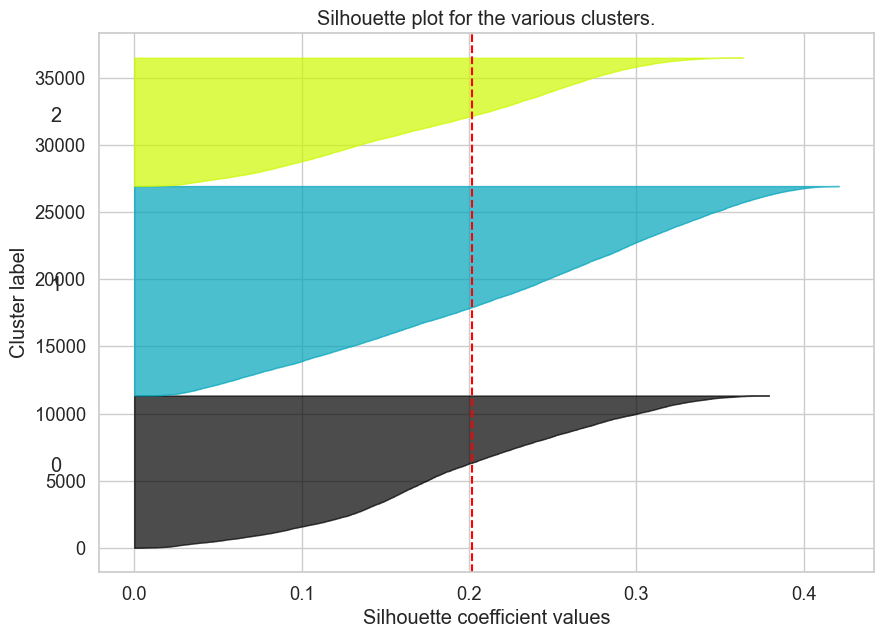

In [56]:
n_clusters = n_clusters # sesuai elbow method

sample_silhouette_values = silhouette_samples(datacust_cluster, cluster_labels)

silhouette_avg = silhouette_score(datacust_cluster, cluster_labels)

# Menyusun plot Silhouette
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show();

# PCA

In [57]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(datacust_cluster)
pcs = pca.transform(datacust_cluster)

PCA(n_components=2)

In [58]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = datacust_cluster['K_Cluster']
data_pca.sample(10, random_state=123)

PC 1                 PC 2  cluster
11257  2.7030507290530634    3.052986942924867        0
35674   2.665048842637568     3.03994257684974        0
24680 -0.5941135684106266   -2.365409583610111        2
1422   -3.270309979468646  -0.3841069127247689        1
12131   4.759856015559149   -3.525085167697066        2
7188   -1.236364200536753  -0.5754209541913011        1
12225  5.7071466596520715  -1.2373287336109868        0
30608  -4.000054990599377 -0.06587806607075253        1
29005  1.4519670863724068   0.4915427562063187        0
11959 -4.2863992388605885  -0.4510661249134743        1

In [59]:
cust_cluster.head(1)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0   Unaccompanied          Working    Higher education            Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                     0.01885       19241           2329   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            5,170.0              812          0.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   

  ORGANIZATION_TYPE       EXT_SOURCE_1       EXT_SOURCE_2       EXT_SOURCE_3  \
0      Kindergarten 0.7526144906031748 0.7896543511176771 0.1595195404777181   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 1,740.0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_11  \
0                0                0                0                 0   

   FLAG_DOCUMENT_18  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  \
0                        0.0                         0.0   52   

   YEAR_EMPLOYMENT  YEAR_REGISTRATION  YEAR_ID_PUBLISH  \
0                6               14.0                2   

   YEAR_LAST_PHONE_CHANGE  AGE_CAT        INCOME_CAT        CREDIT_CAT  DTI%  \
0                     4.0  FIFTIES  UPPER MID INCOME  UPPER MID CREDIT 15.23   

   CUR%  PRICE_TO_INCOME%  ANNUITY_TO_CREDIT%  INCOME_CREDIT_RATIO%  \
0  4.21            333.33                3.61                 23.73   

   CREDIT_ANNUITY_RATIO%  GOODS_CREDIT_RATIO%  AMT_INTEREST_PAID  \
0                   3.61                79.11          118,800.0   

   AMT_INTEREST_RATE%  YEAR_CREDIT_DURATION  K_Cluster  
0                26.4                  27.0          0

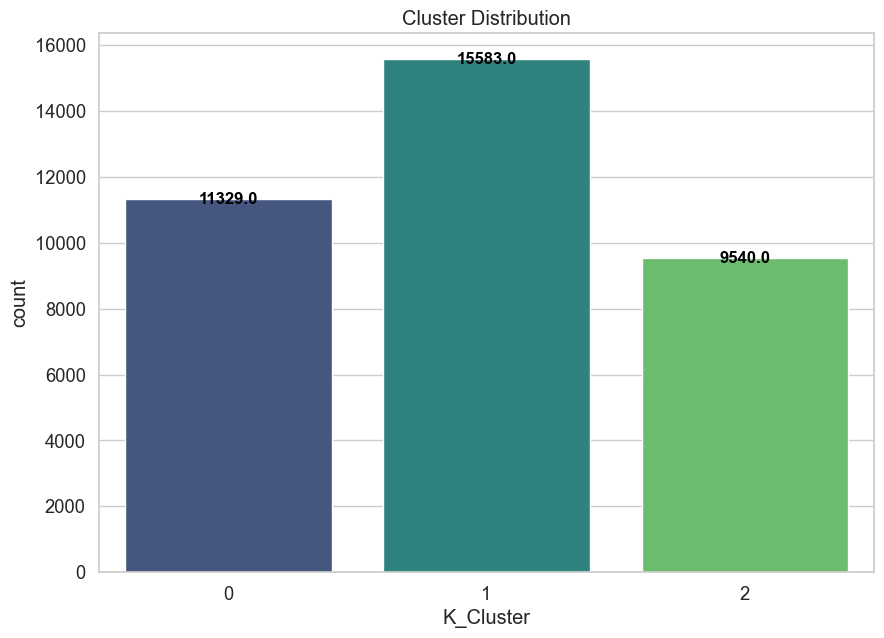

In [60]:
# Distribution

plt.figure(figsize=(10,7))
pl = sns.countplot(x = cust_cluster['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')

for bar in pl.patches:
    pl.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center',
                size=12, color='black', weight='bold')

    
plt.show();

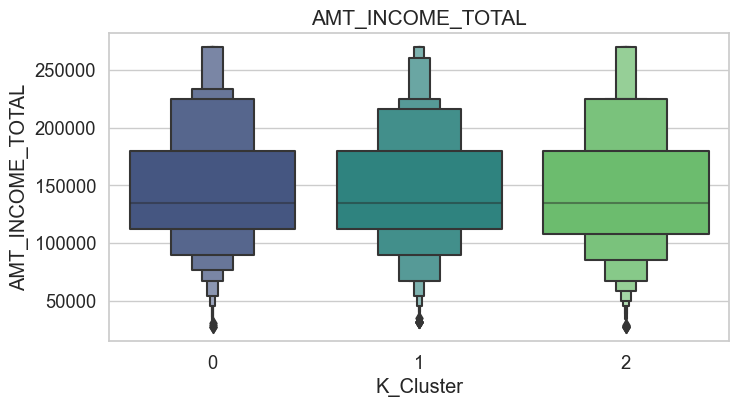

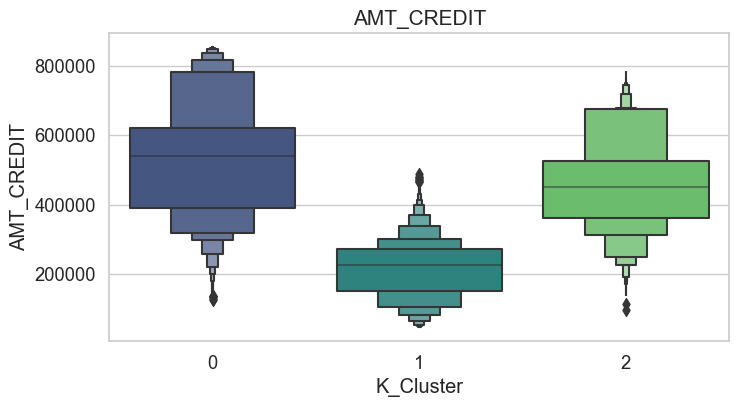

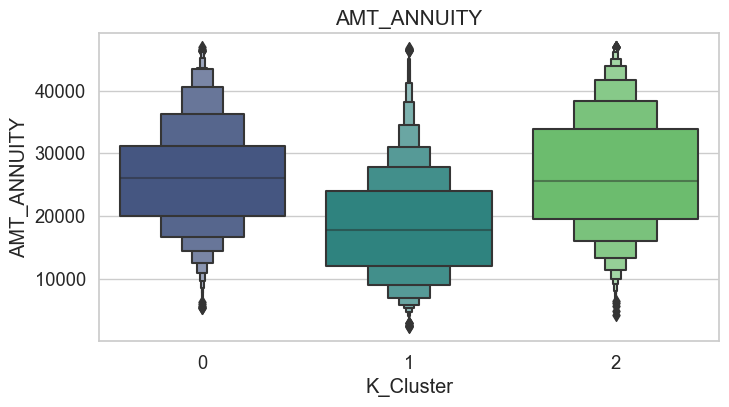

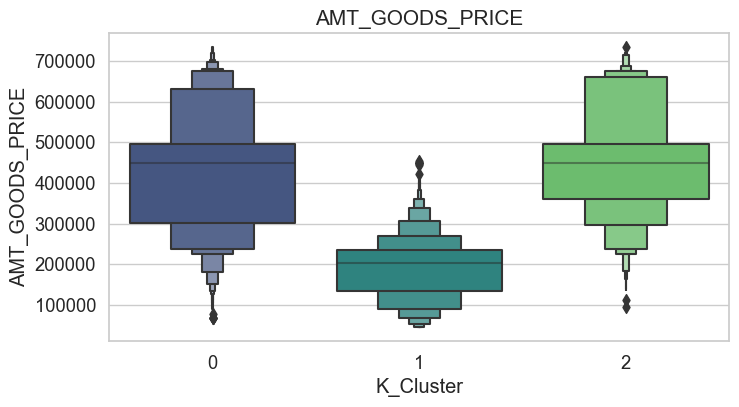

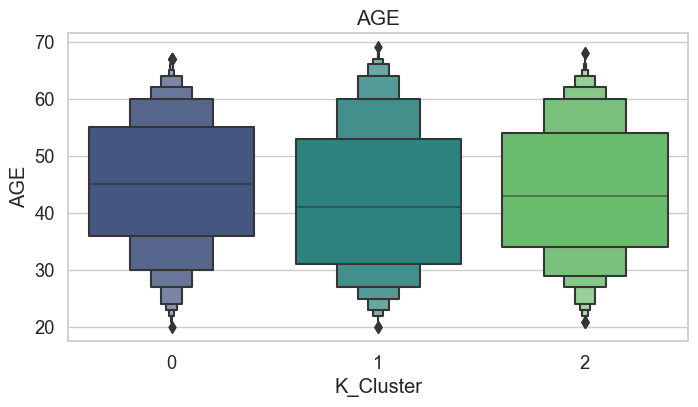

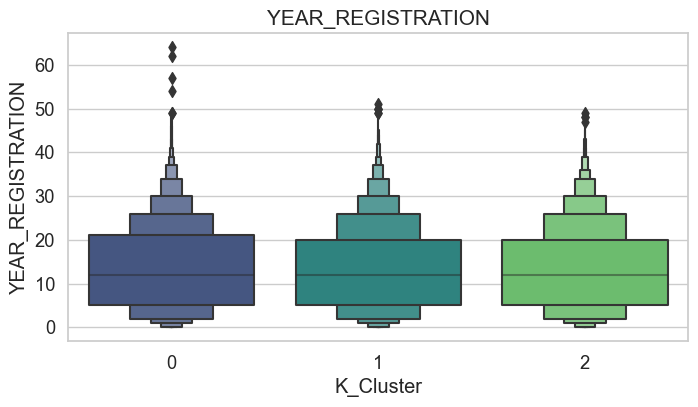

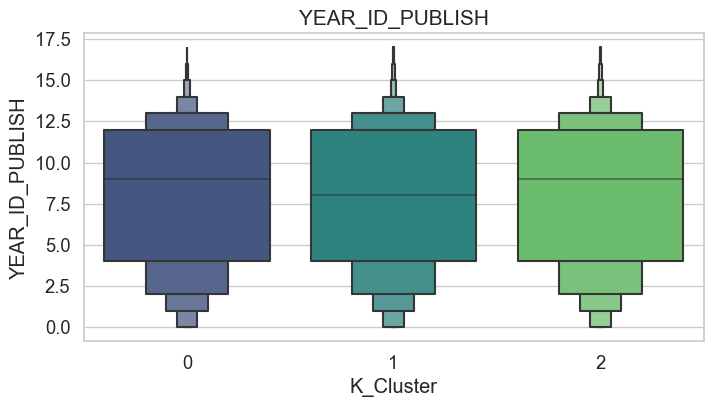

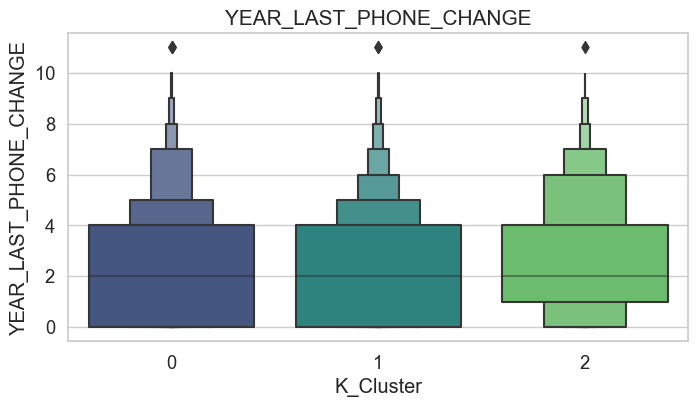

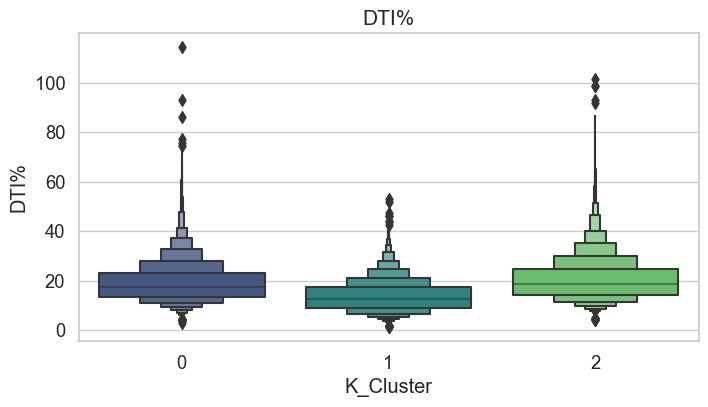

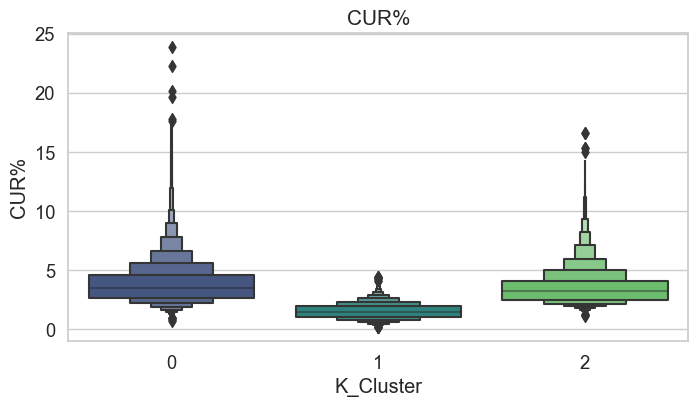

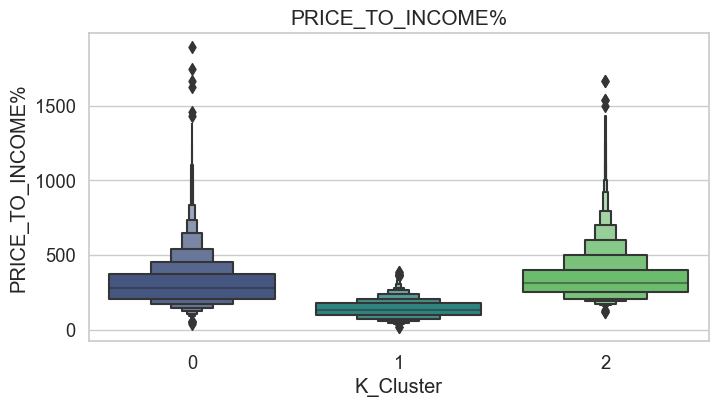

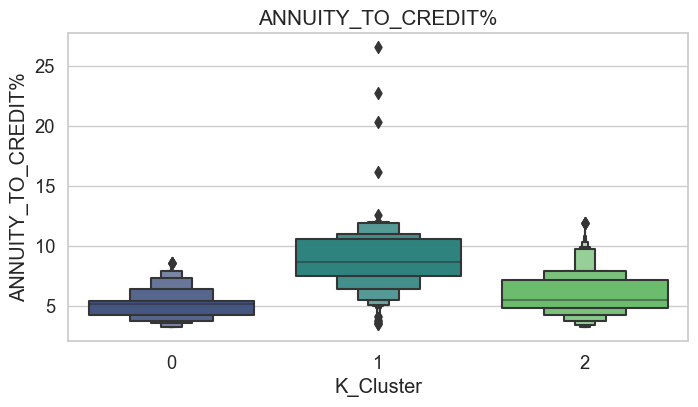

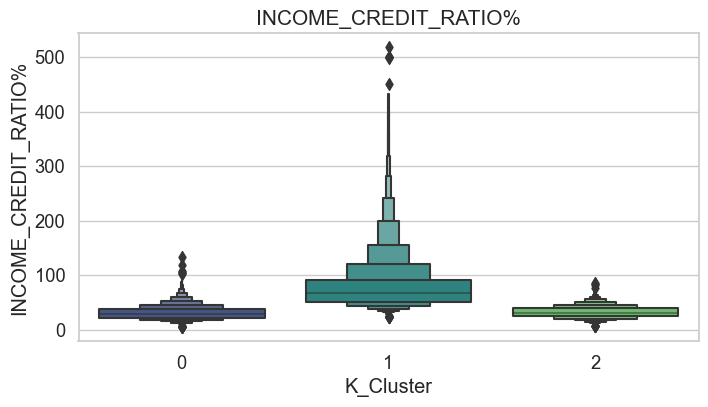

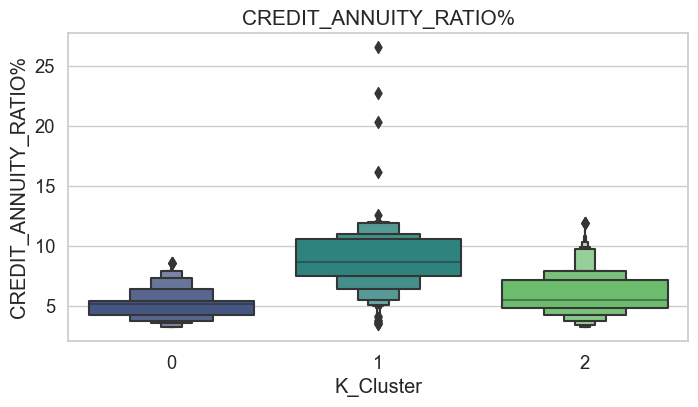

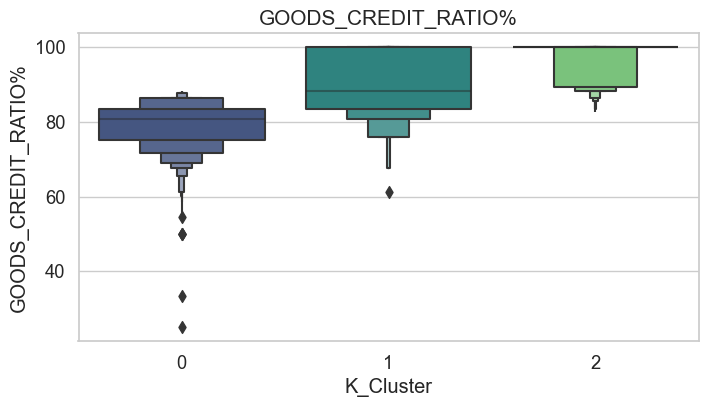

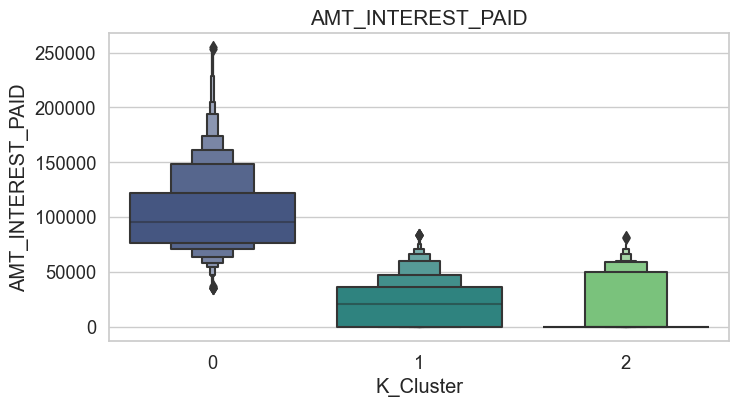

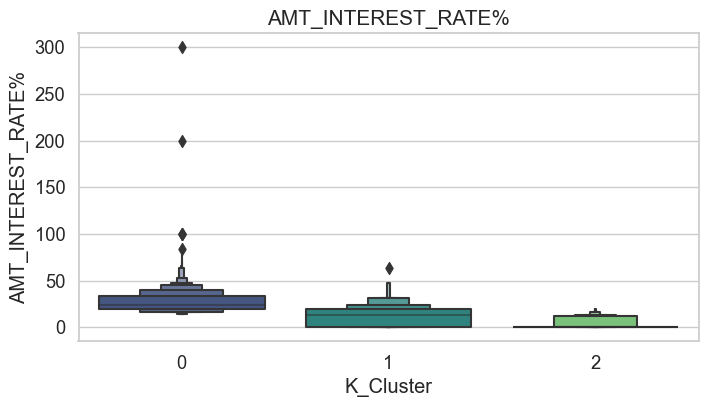

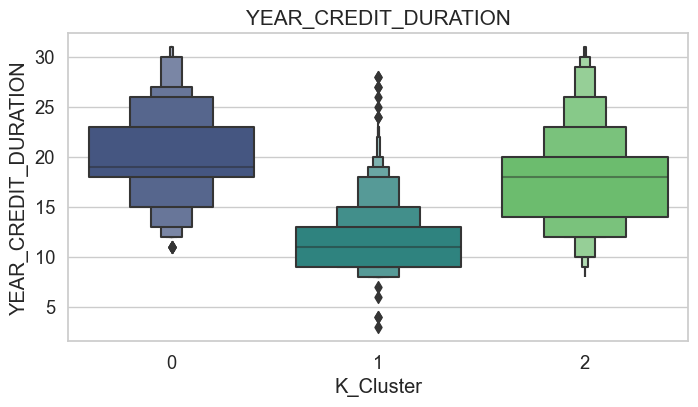

In [61]:
# by cluster

for i in clean_df.columns:
    plt.figure(figsize=(8,4))
    pl = sns.boxenplot(x = cust_cluster['K_Cluster'], y = cust_cluster[i], palette='viridis')
    pl.set_title(i, fontsize=15)
plt.show();

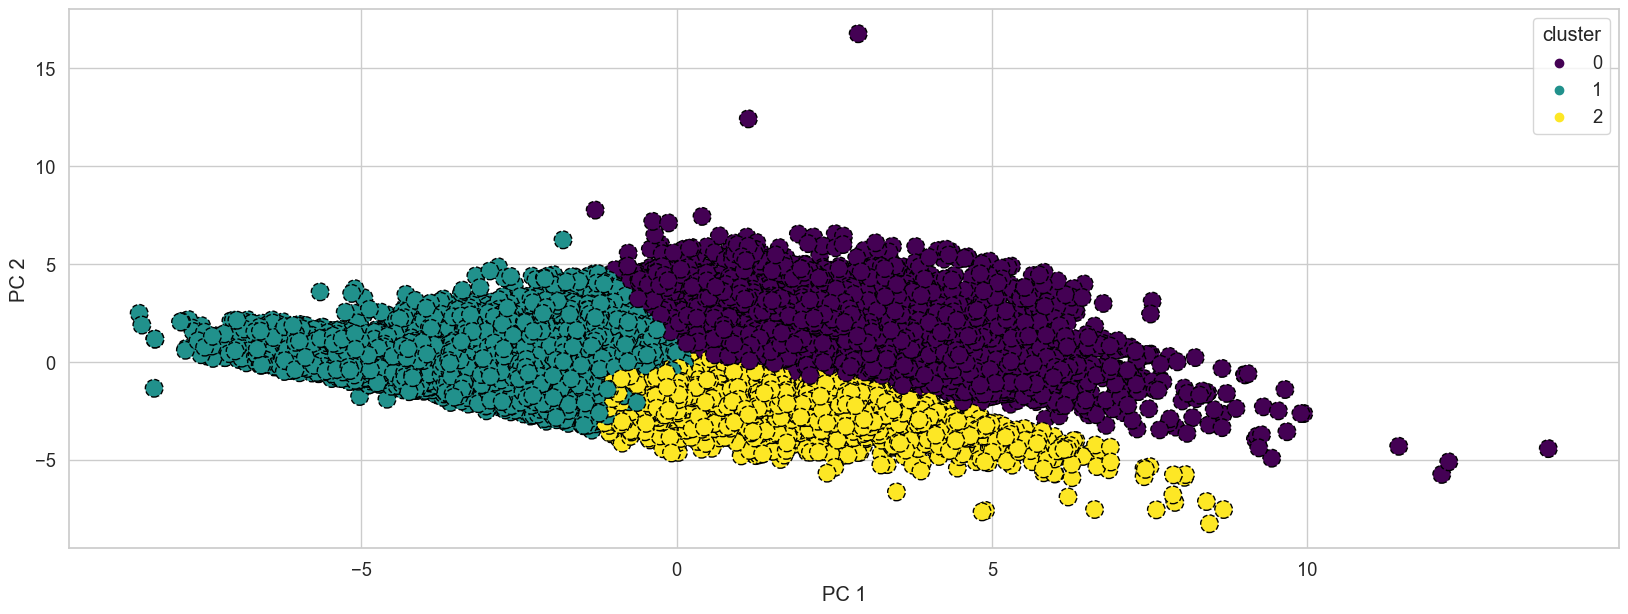

In [62]:
fig, ax = plt.subplots(figsize=(20,7))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette='viridis',
    s=160,
    ax=ax
)
plt.show();

In [63]:
cust_cluster.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
4      100038         Cash loans           M            Y               N   
6      100057         Cash loans           M            Y               Y   
7      100065         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   
1             0          99,000.0   222,768.0     17,370.0        180,000.0   
4             1         180,000.0   625,500.0     32,067.0        625,500.0   
6             2         180,000.0   499,221.0     22,117.5        373,500.0   
7             0         166,500.0   180,000.0     14,220.0        180,000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   
6   Unaccompanied          Working               Higher education   
7   Unaccompanied          Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                     0.01885   
1               Married  House / apartment                    0.035792   
4               Married  House / apartment                    0.010032   
6               Married  House / apartment                      0.0228   
7  Single / not married       With parents                    0.005144   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       19241           2329            5,170.0              812          0.0   
1       18064           4469            9,118.0             1623          0.0   
4       13040           2191            4,000.0             4262         16.0   
6       16685           2580           10,125.0              241          3.0   
7        9516           1387            5,063.0             2055          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
4           1               1                1                 1           0   
6           1               1                0                 1           0   
7           1               1                1                 1           1   

   FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1               Laborers              2.0                     2   
1           0     Low-skill Laborers              2.0                     2   
4           0               Laborers              3.0                     2   
6           0  High skill tech staff              4.0                     2   
7           0             Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
4                            2                     FRIDAY   
6                            2                   THURSDAY   
7                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
4                        5                           0   
6                        9                           0   
7                        7                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT

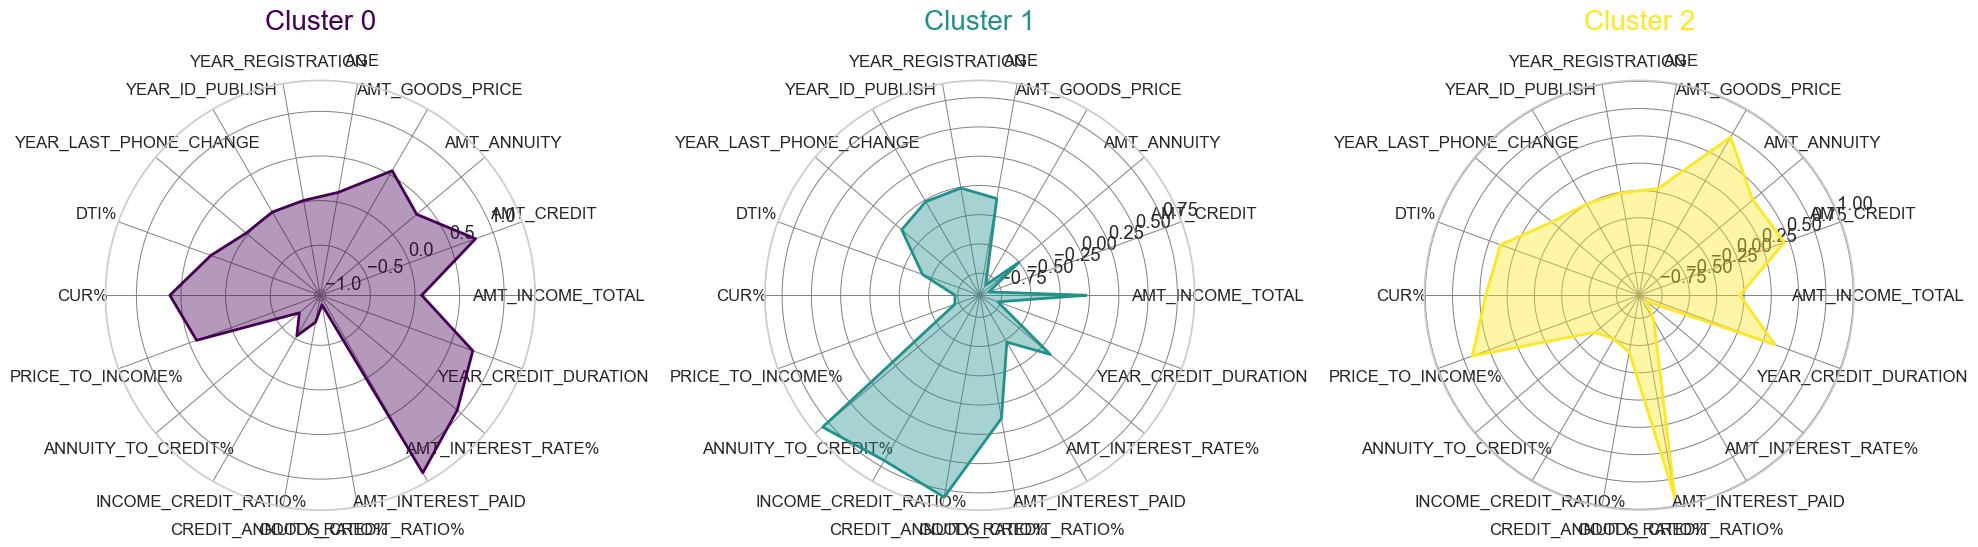

In [64]:
df_customer = datacust_cluster.copy()

# Standardize the data
scaler = StandardScaler()
df_customer_standardized = pd.DataFrame(scaler.fit_transform(df_customer.drop(columns=['K_Cluster'])),
                                        columns=df_customer.columns[:-1],
                                        index=df_customer.index)
df_customer_standardized['K_Cluster'] = df_customer['K_Cluster']
cluster_centroids = df_customer_standardized.groupby('K_Cluster').mean()

# Function to create radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Radar chart settings
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Colors
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_centroids)))

# Create subplots
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(cluster_centroids))

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist() + [cluster_centroids.loc[i].iloc[0]]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Set ticks and labels
for axis in ax:
    axis.set_xticks(angles[:-1])
    axis.set_xticklabels(labels[:-1], fontsize=12, rotation=45)
    axis.grid(color='grey', linewidth=0.7)

plt.tight_layout()
plt.show();

# Cluster by Statistic

In [65]:
do.shape
df_customer.shape
df_customer.head()

(36452, 81)

(36452, 19)

AMT_INCOME_TOTAL          AMT_CREDIT          AMT_ANNUITY  \
0 -0.2190583053763798  1.0162541111439944 -0.26986498235589573   
1 -0.8987533114365653 -0.7950402274187751  -0.6124547197399718   
2   0.630560452198852   1.313048595459055   0.9656807983085364   
3   0.630560452198852  0.6520448796773701 -0.10267732490188966   
4  0.3756748249262825 -1.0189080670164208  -0.9506956452249551   

     AMT_GOODS_PRICE                 AGE     YEAR_REGISTRATION  \
0 0.7140718143593803  0.6840028332745317     0.061053982699008   
1 -0.891062555384933  0.4401391695869333    1.0810547972845719   
2 1.7574091546931838 -0.6978912609551924   -0.3469463431352176   
3 0.2592837429318248  0.1149876180034688    1.3870550416602412   
4 -0.891062555384933 -1.4294822520179875 -0.040946098759548404   

      YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE                 DTI%  \
0 -1.3826646007778935      0.6984551817082807 -0.23584433983645609   
1 -0.9155398692998427      -1.043835127169448 0.043583125175517226   
2  0.7193966908733355    -0.17268997273058356  0.07610270084501407   
3 -1.8497893322559444      0.2628826044888486  -0.5899463860154224   
4 -0.6819775035608172      0.2628826044888486   -1.041607159202879   

                   CUR%    PRICE_TO_INCOME%  ANNUITY_TO_CREDIT%  \
0    0.8384030632027496  0.5829770601326174  -1.390566534452281   
1   -0.3231425631928357 -0.4313315271290383 0.36977258428874993   
2   0.40578657990235306  0.6778404531858658 -0.7519709591572054   
3 -0.014977397006251806 -0.2594125480459459  -1.046061026727306   
4   -1.0165141871126493  -0.924795232277587 0.41178545108447884   

   INCOME_CREDIT_RATIO%  CREDIT_ANNUITY_RATIO%  GOODS_CREDIT_RATIO%  \
0   -0.7124359729108862     -1.390566534452281  -0.9929454188582488   
1  -0.19031742775020236    0.36977258428874993  -0.8173432771535908   
2      -0.5851207313338    -0.7519709591572054   1.1776633031596877   
3  -0.40158509595138675     -1.046061026727306  -1.4387047016469976   
4    1.0213202970408393    0.41178545108447884   1.1776633031596877   

     AMT_INTEREST_PAID  AMT_INTEREST_RATE%  YEAR_CREDIT_DURATION  K_Cluster  
0   1.5642777224157096  0.9345918574678801     2.070899346744297          0  
1 -0.04225260396740514  0.7326140349695409   -0.6756989451622356          1  
2  -0.9459259125579073 -1.0851863675155133    0.6060469243941463          2  
3   1.7105161008471272   1.490030869338313     1.155366582775453          0  
4  -0.9459259125579073 -1.0851863675155133   -0.6756989451622356          1

In [66]:
feats = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
         'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
         'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
         'OWN_CAR_AGE', 'FLAG_MOBIL','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
         'AGE', 'YEAR_EMPLOYMENT','YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
         'YEAR_LAST_PHONE_CHANGE','DTI%', 'CUR%', 'PRICE_TO_INCOME%', 
         'ANNUITY_TO_CREDIT%', 'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 
         'GOODS_CREDIT_RATIO%', 'AMT_INTEREST_PAID', 'AMT_INTEREST_RATE%', 
         'YEAR_CREDIT_DURATION', 'K_Cluster'
        ]

In [67]:
final = cust_cluster.copy()

In [68]:
cluster_g = final.groupby('K_Cluster').agg({'SK_ID_CURR':'count',
                                                   'AMT_CREDIT': ['min','mean','median','max'],
                                                   'AMT_ANNUITY': ['min','mean','median','max'],
                                                   'AMT_GOODS_PRICE': ['min','mean','median','max'],
                                                   'YEAR_EMPLOYMENT': ['min','mean','median','max'],
                                                   'AGE': ['min','mean','median','max'],
                                                   'AMT_INTEREST_PAID': ['min','mean','median','max'],
                                                   'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                                   'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                                   'CNT_CHILDREN': ['min','mean','median','max'],
                                                   'AMT_INCOME_TOTAL': ['min','mean','median','max'],
                                                   'NAME_TYPE_SUITE': lambda x: x.mode().iloc[0],
                                                   'NAME_CONTRACT_TYPE': lambda x: x.mode().iloc[0],
                                                   'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                                   'CODE_GENDER': lambda x: x.mode().iloc[0],
                                                   'FLAG_OWN_CAR': lambda x: x.mode().iloc[0],
                                                   'NAME_HOUSING_TYPE':lambda x: x.mode().iloc[0],
                                                   'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
                                                   'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                                   'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                                   'OCCUPATION_TYPE':lambda x: x.mode().iloc[0]
                                                  }).reset_index(drop=True).round(4)

cluster_g

SK_ID_CURR AMT_CREDIT                                  AMT_ANNUITY  \
       count        min         mean    median       max         min   
0      11329  124,969.5 525,858.8972 539,100.0 854,896.5     5,382.0   
1      15583   45,000.0 211,452.7874 225,000.0 487,318.5     2,295.0   
2       9540   94,500.0 461,671.4283 450,000.0 786,528.0     4,279.5   

                                AMT_GOODS_PRICE                         \
         mean   median      max             min         mean    median   
0 26,332.8934 26,064.0 46,899.0        67,500.0 422,528.0708 450,000.0   
1 18,428.3117 17,775.0 46,795.5        45,000.0 189,173.7489 202,500.0   
2 26,791.3627 25,578.0 46,899.0        94,500.0 449,715.2061 450,000.0   

            YEAR_EMPLOYMENT                       AGE                     \
        max             min     mean median   max min    mean median max   
0 733,500.0               0 237.7587    7.0  1000  20 44.9421   45.0  67   
1 454,500.0               0  203.093    5.0  1000  20 42.3594   41.0  69   
2 733,500.0               0  225.627    7.0  1000  21 43.9769   43.0  68   

  AMT_INTEREST_PAID                                 AMT_INTEREST_RATE%  \
                min         mean   median       max                min   
0          35,640.0 103,330.8264 95,989.5 254,826.0               13.2   
1               0.0  22,279.0385 21,384.0  84,073.5                0.0   
2               0.0  11,956.2222      0.0  81,855.0                0.0   

                       YEAR_CREDIT_DURATION                     CNT_CHILDREN  \
     mean median   max                  min    mean median  max          min   
0 26.5059  23.76 300.0                 11.0 19.8297   19.0 31.0            0   
1 12.1928   13.2 63.36                  3.0 11.4704   11.0 28.0            0   
2  2.8047    0.0 21.12                  8.0 17.6671   18.0 31.0            0   

                    AMT_INCOME_TOTAL                                   \
    mean median max              min         mean    median       max   
0  0.388    0.0  11         27,000.0 150,619.0881 135,000.0 270,000.0   
1 0.3931    0.0  11         31,500.0 144,939.7818 135,000.0 270,000.0   
2 0.3477    0.0   5         26,941.5 144,548.2934 135,000.0 270,000.0   

  NAME_TYPE_SUITE NAME_CONTRACT_TYPE NAME_INCOME_TYPE CODE_GENDER  \
         <lambda>           <lambda>         <lambda>    <lambda>   
0   Unaccompanied         Cash loans          Working           F   
1   Unaccompanied         Cash loans          Working           F   
2   Unaccompanied         Cash loans          Working           F   

  FLAG_OWN_CAR  NAME_HOUSING_TYPE FLAG_OWN_REALTY  \
      <lambda>           <lambda>        <lambda>   
0            N  House / apartment               Y   
1            N  House / apartment               Y   
2            N  House / apartment               Y   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS OCCUPATION_TYPE  
                        <lambda>           <lambda>        <lambda>  
0  Secondary / secondary special            Married        Laborers  
1  Secondary / secondary special            Married        Laborers  
2  Secondary / secondary special            Married        Laborers

In [69]:
def count3d(df, column1, column2):
    count_3d_result = df.groupby([column1, column2]).size().unstack(fill_value=0)
    
    count_3d_result[f'Sum_{column1}'] = df.groupby(column1).size()

    return count_3d_result

In [70]:
count3d(final, 'K_Cluster','AMT_CREDIT')

AMT_CREDIT  45,000.0  47,970.0  49,500.0  49,752.0  52,128.0  54,000.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                110         2        16        73       161        22   
2                  0         0         0         0         0         0   

AMT_CREDIT  54,504.0  54,729.0  55,692.0  57,339.0  58,500.0  59,256.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  1         3        11        11        19         6   
2                  0         0         0         0         0         0   

AMT_CREDIT  59,701.5  60,988.5  62,554.5  63,000.0  64,678.5  65,182.5  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  8         1        52        12         7         4   
2                  0         0         0         0         0         0   

AMT_CREDIT  65,403.0  66,091.5  66,384.0  66,501.0  66,829.5  67,500.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  2         1         4         1         6       124   
2                  0         0         0         0         0         0   

AMT_CREDIT  67,765.5  69,651.0  71,109.0  71,316.0  71,919.0  71,955.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                 38         5         5         1         1         3   
2                  0         0         0         0         0         0   

AMT_CREDIT  72,000.0  72,400.5  72,981.0  73,188.0  74,182.5  74,628.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                 11         7        13         1         1        49   
2                  0         0         0         0         0         0   

AMT_CREDIT  76,306.5  76,410.0  76,500.0  76,572.0  77,031.0  77,967.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  3         1        24         1         8         2   
2                  0         0         0         0         0         0   

AMT_CREDIT  78,192.0  79,605.0  81,000.0  81,549.0  81,756.0  82,957.5  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                138         2        29         1        11         3   
2                  0         0         0         0         0         0   

AMT_CREDIT  83,403.0  83,538.0  84,073.5  84,577.5  85,500.0  86,098.5  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  8        17         1         9        15         1   
2                  0         0         0         0         0         0   

AMT_CREDIT  86,301.0  88,285.5  88,618.5  88,672.5  88,884.0  89,109.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                  4         1        38         1        14         2   
2                  0         0         0         0         0         0   

AMT_CREDIT  89,554.5  90,000.0  90,418.5  91,692.0  91,840.5  92,655.0  \
K_Cluster                                                                
0                  0         0         0         0         0         0   
1                 12       241         1         1         1        

# Summary on Unsupervised :
terdapat 3 clusters, dengan perbedaan yang tipis antar tiap cluster.
hanya bisa terlihat di min AMT_CREDIT, min AMY_GOODS_PRICE, AMT_INTEREST_RATE% paling terlihat, dimana cluster 0= bunga paling rendah, 1= bunga paling tinggi, 2= bunga paling mid.

# Using Logistic Regression

In [71]:
finish = final.copy()

import joblib
from sklearn.preprocessing import LabelEncoder

loaded_model = joblib.load('logistic_regression_model.joblib')

list_object = final.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    finish[col] = encoder.fit_transform(finish[col].values.tolist())

features = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_3', 'AGE_CAT', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

X_unsupervised = finish[features]

predictions_unsupervised = loaded_model.predict(X_unsupervised)

final['PREDICTION'] = predictions_unsupervised

final.head()
final['PREDICTION'].value_counts()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
4      100038         Cash loans           M            Y               N   
6      100057         Cash loans           M            Y               Y   
7      100065         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0         135,000.0   568,800.0     20,560.5        450,000.0   
1             0          99,000.0   222,768.0     17,370.0        180,000.0   
4             1         180,000.0   625,500.0     32,067.0        625,500.0   
6             2         180,000.0   499,221.0     22,117.5        373,500.0   
7             0         166,500.0   180,000.0     14,220.0        180,000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   
6   Unaccompanied          Working               Higher education   
7   Unaccompanied          Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                     0.01885   
1               Married  House / apartment                    0.035792   
4               Married  House / apartment                    0.010032   
6               Married  House / apartment                      0.0228   
7  Single / not married       With parents                    0.005144   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       19241           2329            5,170.0              812          0.0   
1       18064           4469            9,118.0             1623          0.0   
4       13040           2191            4,000.0             4262         16.0   
6       16685           2580           10,125.0              241          3.0   
7        9516           1387            5,063.0             2055          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
4           1               1                1                 1           0   
6           1               1                0                 1           0   
7           1               1                1                 1           1   

   FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1               Laborers              2.0                     2   
1           0     Low-skill Laborers              2.0                     2   
4           0               Laborers              3.0                     2   
6           0  High skill tech staff              4.0                     2   
7           0             Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
4                            2                     FRIDAY   
6                            2                   THURSDAY   
7                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
4                        5                           0   
6                        9                           0   
7                        7                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT

PREDICTION
1    34635
0     1817
Name: count, dtype: int64

In [72]:
final.groupby(['K_Cluster','PREDICTION'])['SK_ID_CURR'].size().reset_index(name='COUNT')

K_Cluster  PREDICTION  COUNT
0          0           0    604
1          0           1  10725
2          1           0    684
3          1           1  14899
4          2           0    529
5          2           1   9011

## Split Dataset by Prediction

In [73]:
final0 = final[final['PREDICTION'] == 0]
final1 = final[final['PREDICTION'] == 1]

final0.shape
final1.shape

(1817, 83)

(34635, 83)

### by Age_Cat

In [74]:
final0.groupby(['K_Cluster','AGE_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')

final1.groupby(['K_Cluster','AGE_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')

K_Cluster          AGE_CAT  COUNT
0           0          FIFTIES    341
1           0         FOURTIES    205
2           0  SIXTIES & ABOVE     53
3           0         THIRTIES      5
4           1          FIFTIES    324
5           1         FOURTIES    265
6           1  SIXTIES & ABOVE     84
7           1         THIRTIES     10
8           1         TWENTIES      1
9           2          FIFTIES    310
10          2         FOURTIES    167
11          2  SIXTIES & ABOVE     42
12          2         THIRTIES      9
13          2         TWENTIES      1

K_Cluster          AGE_CAT  COUNT
0           0          FIFTIES   2519
1           0         FOURTIES   2772
2           0  SIXTIES & ABOVE   1450
3           0         THIRTIES   2690
4           0         TWENTIES   1294
5           1          FIFTIES   2425
6           1         FOURTIES   3091
7           1  SIXTIES & ABOVE   2030
8           1         THIRTIES   4318
9           1         TWENTIES   3035
10          2          FIFTIES   1912
11          2         FOURTIES   2132
12          2  SIXTIES & ABOVE   1164
13          2         THIRTIES   2498
14          2         TWENTIES   1305

In [75]:
final0.groupby('AGE_CAT').agg({'SK_ID_CURR':'count',
                                'AMT_CREDIT': ['min','mean','median','max'],
                                'AMT_ANNUITY': ['min','mean','median','max'],
                                'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                'CODE_GENDER': lambda x: x.mode().iloc[0],
                                'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
                                'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                'OCCUPATION_TYPE':lambda x: x.mode().iloc[0]
                                }).reset_index(drop=True).round(4)
    


SK_ID_CURR AMT_CREDIT                                  AMT_ANNUITY  \
       count        min         mean    median       max         min   
0        975   45,000.0 420,122.9954 414,612.0 854,896.5     2,439.0   
1        637   45,000.0 404,881.4882 360,000.0 854,896.5     4,594.5   
2        179   49,500.0 389,743.8184 310,810.5 853,200.0     5,202.0   
3         24  199,008.0 431,750.8125 450,000.0 827,496.0    11,250.0   
4          2  270,000.0    423,562.5 423,562.5 577,125.0    13,500.0   

                                 AMT_INTEREST_RATE%                       \
         mean    median      max                min    mean median   max   
0 23,849.6954  23,395.5 46,899.0                0.0 13.7463   13.2 63.36   
1 23,980.9521  23,881.5 46,899.0                0.0 13.9516   13.2 200.0   
2 23,490.2514  23,769.0 44,046.0                0.0 13.4212  15.84  42.9   
3   29,133.75 30,057.75 43,839.0                0.0 11.8917  12.87 25.74   
4    29,614.5  29,614.5 45,729.0                0.0    5.28   5.28 10.56   

  YEAR_CREDIT_DURATION                     NAME_INCOME_TYPE CODE_GENDER  \
                   min    mean median  max         <lambda>    <lambda>   
0                  8.0 17.3682   17.0 31.0        Pensioner           F   
1                  8.0 16.6389   17.0 31.0          Working           F   
2                  6.0    16.0   16.0 31.0        Pensioner           F   
3                  8.0 14.8333   13.5 27.0          Working           F   
4                 12.0    16.0   16.0 20.0          Working           F   

  FLAG_OWN_REALTY NAME_EDUCATION_TYPE NAME_FAMILY_STATUS OCCUPATION_TYPE  
         <lambda>            <lambda>           <lambda>        <lambda>  
0               Y    Higher education            Married        Laborers  
1               Y    Higher education            Married        Laborers  
2               Y    Higher education            Married        Laborers  
3               Y    Higher education            Married      Core staff  
4               Y    Higher education            Married     Accountants

In [76]:
final1.groupby('AGE_CAT').agg({'SK_ID_CURR':'count',
                                'AMT_CREDIT': ['min','mean','median','max'],
                                'AMT_ANNUITY': ['min','mean','median','max'],
                                'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                'CODE_GENDER': lambda x: x.mode().iloc[0],
                                'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
                                'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                'OCCUPATION_TYPE':lambda x: x.mode().iloc[0]
                                }).reset_index(drop=True).round(4)
    


SK_ID_CURR AMT_CREDIT                                  AMT_ANNUITY  \
       count        min         mean    median       max         min   
0       6856   45,000.0 392,266.9474 360,000.0 854,896.5     2,425.5   
1       7995   45,000.0 393,509.2092 361,998.0 854,896.5     2,295.0   
2       4644   45,000.0 354,800.5698 296,280.0 854,896.5     2,596.5   
3       9506   45,000.0 371,056.8224 334,152.0 854,896.5     2,439.0   
4       5634   45,000.0 336,868.7652 301,464.0 854,896.5     3,478.5   

                                 AMT_INTEREST_RATE%                       \
         mean    median      max                min    mean median   max   
0 22,525.1898  22,149.0 46,858.5                0.0 14.9169  15.84 100.0   
1 23,543.4535  23,107.5 46,858.5                0.0 14.6922  15.84 300.0   
2   20,980.75  20,511.0 46,863.0                0.0 14.7998  15.84  66.0   
3 23,626.1953 23,195.25 46,899.0                0.0 13.6256  13.86  66.0   
4 23,589.4553 23,118.75 46,854.0                0.0  13.146   13.2 100.0   

  YEAR_CREDIT_DURATION                     NAME_INCOME_TYPE CODE_GENDER  \
                   min    mean median  max         <lambda>    <lambda>   
0                  8.0 16.9004   17.0 31.0        Pensioner           F   
1                  7.0 16.1851   16.0 31.0          Working           F   
2                  8.0 16.2543   16.0 31.0        Pensioner           F   
3                  3.0 15.1001   14.0 31.0          Working           F   
4                  4.0 13.6418   12.0 31.0          Working           F   

  FLAG_OWN_REALTY            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
         <lambda>                       <lambda>           <lambda>   
0               Y  Secondary / secondary special            Married   
1               Y  Secondary / secondary special            Married   
2               Y  Secondary / secondary special            Married   
3               Y  Secondary / secondary special            Married   
4               Y  Secondary / secondary special            Married   

  OCCUPATION_TYPE  
         <lambda>  
0        Laborers  
1        Laborers  
2        Laborers  
3        Laborers  
4        Laborers

In [77]:
final1[(final1['AGE_CAT'] == 'THIRTIES')]['NAME_EDUCATION_TYPE'].value_counts().to_frame(name='COUNT')
final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 0)]['NAME_EDUCATION_TYPE'].value_counts().to_frame(name='COUNT')
final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 1)]['NAME_EDUCATION_TYPE'].value_counts().to_frame(name='COUNT')
final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 2)]['NAME_EDUCATION_TYPE'].value_counts().to_frame(name='COUNT')

COUNT
NAME_EDUCATION_TYPE                 
Secondary / secondary special   6549
Higher education                2475
Incomplete higher                366
Lower secondary                  109
Academic degree                    7

COUNT
NAME_EDUCATION_TYPE                 
Secondary / secondary special   1928
Higher education                 641
Incomplete higher                 81
Lower secondary                   38
Academic degree                    2

COUNT
NAME_EDUCATION_TYPE                 
Secondary / secondary special   2957
Higher education                1138
Incomplete higher                179
Lower secondary                   43
Academic degree                    1

COUNT
NAME_EDUCATION_TYPE                 
Secondary / secondary special   1664
Higher education                 696
Incomplete higher                106
Lower secondary                   28
Academic degree                    4

#### Business Insight 2

In [78]:
final1[final1['AGE_CAT'] == 'THIRTIES'].groupby('NAME_EDUCATION_TYPE').agg({'SK_ID_CURR':'count',
                                                                            'AMT_CREDIT': ['min','mean','median','max'],
                                                                            'AMT_ANNUITY': ['min','mean','median','max'],
                                                                            'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                                                            'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                                                            'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                                                            'CODE_GENDER': lambda x: x.mode().iloc[0],
                                                                            'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
                                                                            'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                                                            'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                                                            'OCCUPATION_TYPE':lambda x: x.mode().iloc[0]
                                                                            }).reset_index(drop=True).round(4)

SK_ID_CURR AMT_CREDIT                                  AMT_ANNUITY  \
       count        min         mean    median       max         min   
0          7  278,460.0 426,445.7143 450,000.0 550,980.0    15,255.0   
1       2475   45,000.0 378,225.5164 341,280.0 854,896.5     2,983.5   
2        366   49,752.0   355,767.75 312,804.0 835,965.0     4,176.0   
3        109   49,752.0 367,164.4541 360,000.0 745,429.5     5,220.0   
4       6549   45,000.0  369,207.659 333,000.0 854,896.5     2,439.0   

                                AMT_INTEREST_RATE%                       \
         mean   median      max                min    mean median   max   
0 29,989.2857 31,320.0 43,659.0                0.0 13.0114   13.2 31.68   
1 23,831.1618 23,526.0 46,858.5                0.0 12.1986   13.2 63.36   
2 23,168.6434 23,260.5 46,728.0                0.0 13.2815   13.2  56.1   
3 23,255.2156 23,229.0 43,866.0                0.0 13.8631  15.84 47.52   
4 23,573.6784 23,134.5 46,899.0                0.0 14.1808  15.84  66.0   

  YEAR_CREDIT_DURATION                     NAME_INCOME_TYPE CODE_GENDER  \
                   min    mean median  max         <lambda>    <lambda>   
0                 10.0 14.1429   14.0 19.0          Working           F   
1                  4.0  15.343   15.0 31.0          Working           F   
2                  8.0 14.9262   13.0 31.0          Working           F   
3                  8.0 15.2018   13.0 31.0          Working           M   
4                  3.0 15.0174   14.0 31.0          Working           F   

  FLAG_OWN_REALTY            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
         <lambda>                       <lambda>           <lambda>   
0               N                Academic degree            Married   
1               Y               Higher education            Married   
2               Y              Incomplete higher            Married   
3               Y                Lower secondary            Married   
4               Y  Secondary / secondary special            Married   

  OCCUPATION_TYPE  
         <lambda>  
0      Core staff  
1        Laborers  
2        Laborers  
3        Laborers  
4        Laborers

In [79]:
prospect0 = final0[(final0['AGE_CAT'] == 'THIRTIES') | (final0['AGE_CAT'] == 'FOURTIES') | (final0['AGE_CAT'] == 'FIFTIES')]

prospect0.groupby('NAME_EDUCATION_TYPE').agg({'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                              'SK_ID_CURR':'count',
                                              'AMT_INCOME_TOTAL': ['min','mean','median','max'],
                                              'AMT_CREDIT': ['min','mean','median','max'],
                                              'AMT_ANNUITY': ['min','mean','median','max'],
                                              'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                              'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                              'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                              'CODE_GENDER': lambda x: x.mode().iloc[0],
                                              'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
 
                                              'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                              'OCCUPATION_TYPE':lambda x: x.mode().iloc[0],
                                              'K_Cluster':lambda x: x.mode().iloc[0]
                                             }).reset_index(drop=True).round(4)

NAME_EDUCATION_TYPE SK_ID_CURR AMT_INCOME_TOTAL               \
                        <lambda>      count              min         mean   
0                Academic degree          7         45,000.0 163,928.5714   
1               Higher education       1578         45,000.0 164,625.0684   
2              Incomplete higher         28         63,000.0 169,714.2857   
3                Lower secondary          5         54,000.0     96,300.0   
4  Secondary / secondary special         18         41,850.0    141,325.0   

                      AMT_CREDIT                                  AMT_ANNUITY  \
     median       max        min         mean    median       max         min   
0 157,500.0 225,000.0  114,682.5 360,062.3571 383,760.0 532,494.0    11,349.0   
1 157,500.0 270,000.0   45,000.0 415,875.5561 388,998.0 854,896.5     2,439.0   
2 157,500.0 270,000.0   67,765.5 381,393.6429 360,000.0 836,136.0     6,831.0   
3 103,500.0 135,000.0   49,752.0    278,006.4 315,000.0 450,000.0     5,224.5   
4 130,500.0 270,000.0   89,554.5    391,685.0 408,582.0 675,000.0     9,220.5   

                                 AMT_INTEREST_RATE%                       \
         mean    median      max                min    mean median   max   
0 26,596.2857  30,699.0 45,081.0                0.0  5.6571    0.0 17.16   
1 24,070.4686 23,910.75 46,899.0                0.0 13.8106   13.2 200.0   
2 22,262.4643  21,235.5 41,629.5                0.0 14.4021    3.3  56.1   
3    14,652.0  15,151.5 23,107.5                0.0   6.072    0.0  19.8   
4    20,141.5  20,709.0 32,683.5                0.0   17.16  14.52 44.88   

  YEAR_CREDIT_DURATION                     NAME_INCOME_TYPE CODE_GENDER  \
                   min    mean median  max         <lambda>    <lambda>   
0                  9.0 14.8571   13.0 23.0          Working           F   
1                  8.0 17.0437   17.0 31.0          Working           F   
2                  8.0    17.0   18.0 30.0          Working           F   
3                  9.0    16.6   19.0 23.0        Pensioner           F   
4                  9.0 18.3889   18.0 30.0        Pensioner           F   

  FLAG_OWN_REALTY    NAME_FAMILY_STATUS OCCUPATION_TYPE K_Cluster  
         <lambda>              <lambda>        <lambda>  <lambda>  
0               Y               Married        Laborers         2  
1               Y               Married        Laborers         1  
2               Y               Married        Laborers         1  
3               Y                 Widow        Laborers         1  
4               Y  Single / not married        Laborers         0

In [80]:
prospect1 = final1[(final1['AGE_CAT'] == 'THIRTIES') | (final1['AGE_CAT'] == 'FOURTIES') | (final1['AGE_CAT'] == 'FIFTIES')]

prospect1.groupby('NAME_EDUCATION_TYPE').agg({'NAME_EDUCATION_TYPE':lambda x: x.mode().iloc[0],
                                              'SK_ID_CURR':'count',
                                              'AMT_INCOME_TOTAL': ['min','mean','median','max'],
                                              'AMT_CREDIT': ['min','mean','median','max'],
                                              'AMT_ANNUITY': ['min','mean','median','max'],
                                              'AMT_INTEREST_RATE%': ['min','mean','median','max'],
                                              'YEAR_CREDIT_DURATION': ['min','mean','median','max'],
                                              'NAME_INCOME_TYPE': lambda x: x.mode().iloc[0],
                                              'CODE_GENDER': lambda x: x.mode().iloc[0],
                                              'FLAG_OWN_REALTY':lambda x: x.mode().iloc[0],
 
                                              'NAME_FAMILY_STATUS':lambda x: x.mode().iloc[0],
                                              'OCCUPATION_TYPE':lambda x: x.mode().iloc[0],
                                              'K_Cluster':lambda x: x.mode().iloc[0]
                                             }).reset_index(drop=True).round(4)

NAME_EDUCATION_TYPE SK_ID_CURR AMT_INCOME_TOTAL               \
                        <lambda>      count              min         mean   
0                Academic degree          8         81,000.0    178,875.0   
1               Higher education       3846         36,000.0 166,168.5117   
2              Incomplete higher        552         33,300.0  158,657.788   
3                Lower secondary        252         31,500.0    134,325.0   
4  Secondary / secondary special      19699         26,941.5 144,996.8394   

                      AMT_CREDIT                                    \
     median       max        min         mean     median       max   
0 180,000.0 270,000.0  278,460.0    431,077.5  450,000.0 550,980.0   
1 157,500.0 270,000.0   45,000.0 388,579.9165  360,000.0 854,896.5   
2 157,500.0 270,000.0   49,752.0 368,425.1495  319,725.0 854,896.5   
3 135,000.0 270,000.0   49,752.0 369,086.8214 355,137.75 848,745.0   
4 135,000.0 270,000.0   45,000.0 384,204.6262  360,000.0 854,896.5   

  AMT_ANNUITY                                AMT_INTEREST_RATE%          \
          min        mean    median      max                min    mean   
0    15,255.0 28,711.6875  28,494.0 43,659.0                0.0  11.385   
1     2,983.5 24,037.3947  23,566.5 46,858.5                0.0 12.9011   
2     4,176.0 22,968.6277 22,884.75 46,728.0                0.0 13.5698   
3     4,257.0 22,240.1071  21,802.5 43,866.0                0.0 13.5615   
4     2,295.0 23,163.2327  22,977.0 46,899.0                0.0 14.6526   

               YEAR_CREDIT_DURATION                     NAME_INCOME_TYPE  \
  median   max                  min    mean median  max         <lambda>   
0    6.6 31.68                 10.0   15.25   14.5 23.0          Working   
1   13.2  79.2                  4.0 15.6672   15.0 31.0          Working   
2   13.2  56.1                  8.0 15.5127   14.0 31.0          Working   
3  15.84 47.52                  8.0  15.996   16.0 31.0          Working   
4  15.84 300.0                  3.0 16.0333   16.0 31.0          Working   

  CODE_GENDER FLAG_OWN_REALTY NAME_FAMILY_STATUS OCCUPATION_TYPE K_Cluster  
     <lambda>        <lambda>           <lambda>        <lambda>  <lambda>  
0           F               N            Married      Core staff         2  
1           F               Y            Married        Laborers         1  
2           F               Y            Married        Laborers         1  
3           F               Y            Married        Laborers         1  
4           F               Y            Married        Laborers         1

In [81]:
# For overall count
result_all = final1[final1['AGE_CAT'] == 'THIRTIES'].groupby('NAME_EDUCATION_TYPE')['SK_ID_CURR'].count().reset_index(name='COUNT')

# For each cluster count
result_cluster0 = final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 0)].groupby('NAME_EDUCATION_TYPE')['SK_ID_CURR'].count().reset_index(name='COUNT')
result_cluster1 = final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 1)].groupby('NAME_EDUCATION_TYPE')['SK_ID_CURR'].count().reset_index(name='COUNT')
result_cluster2 = final1[(final1['AGE_CAT'] == 'THIRTIES') & (final1['K_Cluster'] == 2)].groupby('NAME_EDUCATION_TYPE')['SK_ID_CURR'].count().reset_index(name='COUNT')


In [82]:
final0[final0['AGE_CAT'] == 'THIRTIES'].describe(include='object')
final1[final1['AGE_CAT'] == 'THIRTIES'].describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                  24          24           24              24   
unique                  2           1            2               2   
top            Cash loans           F            Y               Y   
freq                   23          24           16              16   

       NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
count               24               24                  24   
unique               3                3                   1   
top      Unaccompanied          Working    Higher education   
freq                21               14                  24   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count                  24                 24              24   
unique                  4                  3               8   
top               Married  House / apartment      Core staff   
freq                   19                 21               7   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE   AGE_CAT  \
count                          24                24        24   
unique                          7                13         1   
top                        FRIDAY     Self-employed  THIRTIES   
freq                            5                 5        24   

              INCOME_CAT  CREDIT_CAT  
count                 24          24  
unique                 4           4  
top     UPPER MID INCOME  MID CREDIT  
freq                  11          10

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                9506        9506         9506            9506   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                 9413        6143         6082            6102   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count             9506             9506                           9506   
unique               7                5                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq              7942             6207                           6549   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count                9506               9506            9506   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                 6456               8270            3866   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE   AGE_CAT  \
count                        9506                    9506      9506   
unique                          7                      57         1   
top                       TUESDAY  Business Entity Type 3  THIRTIES   
freq                         1916                    2528      9506   

       INCOME_CAT  CREDIT_CAT  
count        9506        9506  
unique          5           4  
top          HIGH  MID CREDIT  
freq         4181        4078

### INCOME_CAT
Cluster 1 tidak memiliki High Credit & Upper Mid Credit baik di 0 & 1

In [83]:
final0.groupby(['K_Cluster','INCOME_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')
final1.groupby(['K_Cluster','INCOME_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')

K_Cluster        INCOME_CAT  COUNT
0           0              HIGH    316
1           0        LOW INCOME      2
2           0    LOW MID INCOME     56
3           0        UPPER HIGH     46
4           0  UPPER MID INCOME    184
5           1              HIGH    322
6           1        LOW INCOME      3
7           1    LOW MID INCOME     95
8           1        UPPER HIGH     42
9           1  UPPER MID INCOME    222
10          2              HIGH    271
11          2        LOW INCOME      7
12          2    LOW MID INCOME     77
13          2        UPPER HIGH     26
14          2  UPPER MID INCOME    148

K_Cluster        INCOME_CAT  COUNT
0           0              HIGH   4643
1           0        LOW INCOME    116
2           0    LOW MID INCOME   1845
3           0        UPPER HIGH    396
4           0  UPPER MID INCOME   3725
5           1              HIGH   5829
6           1        LOW INCOME    170
7           1    LOW MID INCOME   3104
8           1        UPPER HIGH    485
9           1  UPPER MID INCOME   5311
10          2              HIGH   3437
11          2        LOW INCOME    152
12          2    LOW MID INCOME   1952
13          2        UPPER HIGH    338
14          2  UPPER MID INCOME   3132

### NAME_INCOME_TYPE


In [84]:
sorted(final.NAME_INCOME_TYPE.unique().tolist())

['Commercial associate',
 'Pensioner',
 'State servant',
 'Student',
 'Unemployed',
 'Working']

In [85]:
final0.groupby('K_Cluster').agg({'NAME_INCOME_TYPE':'count', 
                                 'AGE_CAT':'count', 
                                 'INCOME_CAT':'count',
                                 'AMT_INTEREST_RATE%':'mean'
                                 
    
})

NAME_INCOME_TYPE  AGE_CAT  INCOME_CAT  AMT_INTEREST_RATE%
K_Cluster                                                           
0                       604      604         604   25.86132450331126
1                       684      684         684  11.783757309941521
2                       529      529         529  2.4721928166351606

In [86]:
final0.groupby(['K_Cluster', 'NAME_INCOME_TYPE', 'AGE_CAT', 'INCOME_CAT'])['SK_ID_CURR'].size().reset_index(name='count')
final1.groupby(['K_Cluster', 'NAME_INCOME_TYPE', 'AGE_CAT', 'INCOME_CAT'])['SK_ID_CURR'].size().reset_index(name='count')

K_Cluster      NAME_INCOME_TYPE          AGE_CAT        INCOME_CAT  count
0            0  Commercial associate          FIFTIES              HIGH     35
1            0  Commercial associate          FIFTIES    LOW MID INCOME      3
2            0  Commercial associate          FIFTIES        UPPER HIGH      6
3            0  Commercial associate          FIFTIES  UPPER MID INCOME     15
4            0  Commercial associate         FOURTIES              HIGH     34
5            0  Commercial associate         FOURTIES    LOW MID INCOME      3
6            0  Commercial associate         FOURTIES        UPPER HIGH      4
7            0  Commercial associate         FOURTIES  UPPER MID INCOME     18
8            0  Commercial associate  SIXTIES & ABOVE              HIGH      1
9            0             Pensioner          FIFTIES              HIGH     48
10           0             Pensioner          FIFTIES        LOW INCOME      2
11           0             Pensioner          FIFTIES    LOW MID INCOME     15
12           0             Pensioner          FIFTIES        UPPER HIGH      9
13           0             Pensioner          FIFTIES  UPPER MID INCOME     55
14           0             Pensioner         FOURTIES              HIGH      8
15           0             Pensioner         FOURTIES  UPPER MID INCOME      2
16           0             Pensioner  SIXTIES & ABOVE              HIGH     28
17           0             Pensioner  SIXTIES & ABOVE    LOW MID INCOME      7
18           0             Pensioner  SIXTIES & ABOVE        UPPER HIGH      2
19           0             Pensioner  SIXTIES & ABOVE  UPPER MID INCOME     12
20           0         State servant          FIFTIES              HIGH     21
21           0         State servant          FIFTIES    LOW MID INCOME      4
22           0         State servant          FIFTIES        UPPER HIGH      7
23           0         State servant          FIFTIES  UPPER MID INCOME      2
24           0         State servant         FOURTIES              HIGH     20
25           0         State servant         FOURTIES        UPPER HIGH      4
26           0         State servant         FOURTIES  UPPER MID INCOME      8
27           0               Working          FIFTIES              HIGH     65
28           0               Working          FIFTIES    LOW MID INCOME      8
29           0               Working          FIFTIES        UPPER HIGH     11
30           0               Working          FIFTIES  UPPER MID INCOME     35
31           0               Working         FOURTIES              HIGH     51
32           0               Working         FOURTIES    LOW MID INCOME     16
33           0               Working         FOURTIES        UPPER HIGH      3
34           0               Working         FOURTIES  UPPER MID INCOME     34
35           0               Working  SIXTIES & ABOVE              HIGH      1
36           0               Working  SIXTIES & ABOVE  UPPER MID INCOME      2
37           0               Working         THIRTIES              HIGH      4
38           0               Working         THIRTIES  UPPER MID INCOME      1
39           1  Commercial associate          FIFTIES              HIGH     37
40           1  Commercial associate          FIFTIES    LOW MID INCOME      4
41           1  Commercial associate          FIFTIES        UPPER HIGH      6
42           1  Commercial associate          FIFTIES  UPPER MID INCOME      9
43           1  Commercial associate         FOURTIES              HIGH     62
44           1  Commercial associate         FOURTIES    LOW MID INCOME      8
45           1  Commercial associate         FOURTIES        UPPER HIGH      5
46           1  Commercial associate         FOURTIES  UPPER MID INCOME     25
47           1  Commercial associate  SIXTIES & ABOVE    LOW MID INCOME      1
48           1  Commercial associate  SIXTIES & ABOVE  UPPER MID INCOME      2
49           1  Commercial associate         THIRTIES  

K_Cluster      NAME_INCOME_TYPE          AGE_CAT        INCOME_CAT  count
0            0  Commercial associate          FIFTIES              HIGH    179
1            0  Commercial associate          FIFTIES        LOW INCOME      2
2            0  Commercial associate          FIFTIES    LOW MID INCOME     31
3            0  Commercial associate          FIFTIES        UPPER HIGH     23
4            0  Commercial associate          FIFTIES  UPPER MID INCOME    103
5            0  Commercial associate         FOURTIES              HIGH    372
6            0  Commercial associate         FOURTIES        LOW INCOME      2
7            0  Commercial associate         FOURTIES    LOW MID INCOME     47
8            0  Commercial associate         FOURTIES        UPPER HIGH     33
9            0  Commercial associate         FOURTIES  UPPER MID INCOME    220
10           0  Commercial associate  SIXTIES & ABOVE              HIGH     34
11           0  Commercial associate  SIXTIES & ABOVE    LOW MID INCOME      1
12           0  Commercial associate  SIXTIES & ABOVE        UPPER HIGH      1
13           0  Commercial associate  SIXTIES & ABOVE  UPPER MID INCOME     21
14           0  Commercial associate         THIRTIES              HIGH    357
15           0  Commercial associate         THIRTIES    LOW MID INCOME     73
16           0  Commercial associate         THIRTIES        UPPER HIGH     41
17           0  Commercial associate         THIRTIES  UPPER MID INCOME    236
18           0  Commercial associate         TWENTIES              HIGH    180
19           0  Commercial associate         TWENTIES        LOW INCOME      1
20           0  Commercial associate         TWENTIES    LOW MID INCOME     29
21           0  Commercial associate         TWENTIES        UPPER HIGH     20
22           0  Commercial associate         TWENTIES  UPPER MID INCOME    125
23           0             Pensioner          FIFTIES              HIGH    372
24           0             Pensioner          FIFTIES        LOW INCOME     44
25           0             Pensioner          FIFTIES    LOW MID INCOME    277
26           0             Pensioner          FIFTIES        UPPER HIGH     19
27           0             Pensioner          FIFTIES  UPPER MID INCOME    370
28           0             Pensioner         FOURTIES              HIGH     34
29           0             Pensioner         FOURTIES        LOW INCOME      2
30           0             Pensioner         FOURTIES    LOW MID INCOME     14
31           0             Pensioner         FOURTIES        UPPER HIGH      3
32           0             Pensioner         FOURTIES  UPPER MID INCOME     22
33           0             Pensioner  SIXTIES & ABOVE              HIGH    404
34           0             Pensioner  SIXTIES & ABOVE        LOW INCOME     31
35           0             Pensioner  SIXTIES & ABOVE    LOW MID INCOME    348
36           0             Pensioner  SIXTIES & ABOVE        UPPER HIGH     22
37           0             Pensioner  SIXTIES & ABOVE  UPPER MID INCOME    466
38           0             Pensioner         THIRTIES              HIGH      4
39           0             Pensioner         THIRTIES        LOW INCOME      1
40           0             Pensioner         THIRTIES    LOW MID INCOME      3
41           0             Pensioner         THIRTIES  UPPER MID INCOME      9
42           0             Pensioner         TWENTIES              HIGH      1
43           0             Pensioner         TWENTIES    LOW MID INCOME      2
44           0         State servant          FIFTIES              HIGH     58
45           0         State servant          FIFTIES        LOW INCOME      3
46           0         State servant          FIFTIES    LOW MID INCOME     24
47           0         State servant          FIFTIES        UPPER HIGH      5
48           0         State servant          FIFTIES  UPPER MID INCOME     33
49           0         State servant         FOURTIES  

In [87]:
final0.groupby(['K_Cluster','AGE_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')
final1.groupby(['K_Cluster','AGE_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')

K_Cluster          AGE_CAT  COUNT
0           0          FIFTIES    341
1           0         FOURTIES    205
2           0  SIXTIES & ABOVE     53
3           0         THIRTIES      5
4           1          FIFTIES    324
5           1         FOURTIES    265
6           1  SIXTIES & ABOVE     84
7           1         THIRTIES     10
8           1         TWENTIES      1
9           2          FIFTIES    310
10          2         FOURTIES    167
11          2  SIXTIES & ABOVE     42
12          2         THIRTIES      9
13          2         TWENTIES      1

K_Cluster          AGE_CAT  COUNT
0           0          FIFTIES   2519
1           0         FOURTIES   2772
2           0  SIXTIES & ABOVE   1450
3           0         THIRTIES   2690
4           0         TWENTIES   1294
5           1          FIFTIES   2425
6           1         FOURTIES   3091
7           1  SIXTIES & ABOVE   2030
8           1         THIRTIES   4318
9           1         TWENTIES   3035
10          2          FIFTIES   1912
11          2         FOURTIES   2132
12          2  SIXTIES & ABOVE   1164
13          2         THIRTIES   2498
14          2         TWENTIES   1305

In [88]:
final0.describe(include='object')
final1.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                1817        1817         1817            1817   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                 1754        1598         1337            1354   

       NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
count             1817             1817                1817   
unique               7                5                   5   
top      Unaccompanied          Working    Higher education   
freq              1587              681                1752   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count                1817               1817            1817   
unique                  5                  6              17   
top               Married  House / apartment        Laborers   
freq                 1147               1721             913   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE  AGE_CAT INCOME_CAT  \
count                        1817              1817     1817       1817   
unique                          7                49        5          5   
top                       TUESDAY               XNA  FIFTIES       HIGH   
freq                          360               551      975        909   

        CREDIT_CAT  
count         1817  
unique           4  
top     MID CREDIT  
freq           765

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               34635       34635        34635           34635   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                34325       23427        24410           23814   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            34635            34635                          34635   
unique               7                5                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             28800            18200                          27079   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count               34635              34635           34635   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                21703              30772           18393   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE   AGE_CAT INCOME_CAT  \
count                       34635             34635     34635      34635   
unique                          7                58         5          5   
top                       TUESDAY               XNA  THIRTIES       HIGH   
freq                         6904              7287      9506      13909   

        CREDIT_CAT  
count        34635  
unique           4  
top     MID CREDIT  
freq         14840

In [89]:
print(f'Occupation Type not approved :')
list(set(final1.OCCUPATION_TYPE.unique()) - set(final0.OCCUPATION_TYPE.unique()))

print(f'\nOrganization Type not approved :')
list(set(final1.ORGANIZATION_TYPE.unique()) - set(final0.ORGANIZATION_TYPE.unique()))

Occupation Type not approved :


['Low-skill Laborers']


Organization Type not approved :


['Trade: type 5',
 'Trade: type 1',
 'Industry: type 13',
 'Industry: type 8',
 'Cleaning',
 'Mobile',
 'Industry: type 10',
 'Industry: type 6',
 'Religion']

In [90]:
final1[final1['OCCUPATION_TYPE'] == 'Low-skill Laborers'].groupby(['ORGANIZATION_TYPE','CODE_GENDER','K_Cluster'])['SK_ID_CURR'].size().reset_index(name='count')

ORGANIZATION_TYPE CODE_GENDER  K_Cluster  count
0              Agriculture           F          0      2
1              Agriculture           F          1      1
2              Agriculture           F          2      1
3              Agriculture           M          0      2
4              Agriculture           M          1      2
5              Agriculture           M          2      1
6   Business Entity Type 1           F          0      1
7   Business Entity Type 1           M          0      2
8   Business Entity Type 1           M          1      4
9   Business Entity Type 2           F          0      1
10  Business Entity Type 2           F          2      1
11  Business Entity Type 2           M          0      1
12  Business Entity Type 2           M          1      3
13  Business Entity Type 2           M          2      2
14  Business Entity Type 3           F          0      4
15  Business Entity Type 3           F          1      4
16  Business Entity Type 3           F          2      5
17  Business Entity Type 3           M          0     32
18  Business Entity Type 3           M          1     46
19  Business Entity Type 3           M          2     10
20                Cleaning           F          2      1
21                Cleaning           M          0      1
22            Construction           M          0      1
23            Construction           M          1      5
24              Government           F          1      2
25              Government           M          0      1
26              Government           M          1      1
27              Government           M          2      2
28                 Housing           M          1      1
29                 Housing           M          2      3
30        Industry: type 1           F          0      1
31        Industry: type 1           M          0      1
32       Industry: type 11           F          0      1
33       Industry: type 11           M          1      1
34       Industry: type 13           M          1      1
35        Industry: type 3           F          2      1
36        Industry: type 3           M          0      2
37        Industry: type 3           M          1      3
38        Industry: type 3           M          2      3
39        Industry: type 4           M          0      1
40        Industry: type 4           M          1      1
41        Industry: type 5           M          1      2
42        Industry: type 7           M          0      1
43        Industry: type 7           M          1      2
44        Industry: type 9           M          2      1
45            Kindergarten           M          0      1
46                Medicine           M          1      1
47                   Other           F          1      3
48                   Other           F          2      1
49                   Other           M          0      7
50                   Other           M          1      5
51                   Other           M          2      5
52                  Postal           M          1      1
53                Religion           M          2      1
54                  School           M          1      1
55                  School           M          2      1
56           Self-employed           F          0      3
57           Self-employed           F          1      3
58           Self-employed           M          0      5
59           Self-employed           M          1     13
60           Self-employed           M          2      6
61           Trade: type 1           M          1      1
62           Trade: type 2           M          0      1
63           Trade: type 3           M          1      3
64           Trade: type 7           M          0      7
65           Trade: type 7           M          1      4
66           Trade: type 7           M          2      3
67       Transport: type 2           M          1      1
68       Transport: type 4           M          0      1
69              Uni

### Credit Cat

In [91]:
final0.groupby(['K_Cluster','CREDIT_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')
final1.groupby(['K_Cluster','CREDIT_CAT'])['SK_ID_CURR'].size().reset_index(name='COUNT')

K_Cluster        CREDIT_CAT  COUNT
0          0       HIGH CREDIT    121
1          0        LOW CREDIT     14
2          0        MID CREDIT    194
3          0  UPPER MID CREDIT    275
4          1        LOW CREDIT    402
5          1        MID CREDIT    282
6          2       HIGH CREDIT      4
7          2        LOW CREDIT     23
8          2        MID CREDIT    289
9          2  UPPER MID CREDIT    213

K_Cluster        CREDIT_CAT  COUNT
0          0       HIGH CREDIT   1499
1          0        LOW CREDIT    297
2          0        MID CREDIT   4254
3          0  UPPER MID CREDIT   4675
4          1        LOW CREDIT   9751
5          1        MID CREDIT   5148
6          2       HIGH CREDIT     22
7          2        LOW CREDIT    580
8          2        MID CREDIT   5438
9          2  UPPER MID CREDIT   2971

### K_Cluster

In [92]:
final.K_Cluster.value_counts()
final0.K_Cluster.value_counts()
final1.K_Cluster.value_counts()

K_Cluster
1    15583
0    11329
2     9540
Name: count, dtype: int64

K_Cluster
1    684
0    604
2    529
Name: count, dtype: int64

K_Cluster
1    14899
0    10725
2     9011
Name: count, dtype: int64